 #GOAL OF THE PROJECT:
 
 
TO GROUP CUSTOMERS INTO DIFFERENT CATEGORIES (OR SEGMENTS) BASED ON THEIR SHOPPING HABITS AND INFORMATION. FOR EXAMPLE, CUSTOMERS MIGHT BE "FREQUENT BUYERS", "ONE-TIME SHOPPERS", OR "BARGAIN HUNTERS." THIS HELPS BUSINESSES TO TARGET THEM BETTER.

In [1]:
#IMPORT NECESSARY PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [2]:
#LOADING THE DATASET

project= pd.read_csv("/Users/sumaiyairshad/Desktop/MS in Data Science/CAPSTONE PROJECT/E Commerce/E-commerce Customer Segmentation Dataset.csv")
project

,Customer_ID,Customer_Name,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Product_Category,Years_as_Customer,Number_of_Orders,Average_Order_Value,Loyalty_Membership,Discount_Usage,Preferred_Payment_Method,Preferred_Delivery_Option,Device_Used,Last_Activity,Customer_Region,Review_Score,Customer_Segment
0,1,Michelle Charles,69,0,192704,60,1,Fashion,8,78,182.40,1,0,PayPal,Standard,Tablet,33,Asia,2,0
1,2,Kaylee Medina,62,0,165578,36,1,Sports,7,25,342.85,1,1,Credit Card,Standard,Desktop,307,Europe,4,1
2,3,Ronald Hoffman,52,0,66523,46,0,Home,4,68,275.57,1,0,Debit Card,Same-Day,Tablet,131,Asia,2,0
3,4,Sandra Mcguire,56,1,193559,83,0,Sports,5,88,97.62,1,1,Net Banking,Standard,Mobile,185,North America,1,1
4,5,Andrew Mcdonald,56,0,57461,60,0,Sports,5,86,438.02,0,1,Net Banking,Same-Day,Desktop,29,South America,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,21996,Tonya Kramer,22,1,60778,25,1,Home,2,41,642.65,1,1,Credit Card,Same-Day,Mobile,27,South America,2,1
21996,21997,Melvin Valencia,38,0,129255,14,0,Home,12,23,598.19,0,1,Debit Card,Same-Day,Desktop,135,Asia,2,0
21997,21998,Shannon Mitchell,58,0,194525,81,1,Sports,8,11,204.23,1,0,Credit Card,Standard,Desktop,301,Asia,1,2
21998,21999,Allison West,23,0,28331,82,1,Home,2,59,247.71,1,0,Credit Card,Same-Day,Mobile,157,North America,5,2


In [3]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                22000 non-null  int64  
 1   Customer_Name              22000 non-null  object 
 2   Age                        22000 non-null  int64  
 3   Gender                     22000 non-null  int64  
 4   Annual_Income              22000 non-null  int64  
 5   Spending_Score             22000 non-null  int64  
 6   Marital_Status             22000 non-null  int64  
 7   Product_Category           22000 non-null  object 
 8   Years_as_Customer          22000 non-null  int64  
 9   Number_of_Orders           22000 non-null  int64  
 10  Average_Order_Value        22000 non-null  float64
 11  Loyalty_Membership         22000 non-null  int64  
 12  Discount_Usage             22000 non-null  int64  
 13  Preferred_Payment_Method   22000 non-null  obj

In [4]:
project.tail(10)

,Customer_ID,Customer_Name,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Product_Category,Years_as_Customer,Number_of_Orders,Average_Order_Value,Loyalty_Membership,Discount_Usage,Preferred_Payment_Method,Preferred_Delivery_Option,Device_Used,Last_Activity,Customer_Region,Review_Score,Customer_Segment
21990,21991,Ms. Jacqueline Copeland,67,0,69817,55,0,Electronics,6,19,520.46,1,0,Debit Card,Same-Day,Tablet,161,South America,1,0
21991,21992,Tonya White,64,0,55416,49,1,Beauty,12,15,729.62,1,1,PayPal,Standard,Mobile,157,South America,5,0
21992,21993,David Garcia,56,0,55748,29,0,Sports,10,10,951.88,1,1,Credit Card,Express,Mobile,34,Europe,5,1
21993,21994,Eileen Cooper,29,0,122466,7,0,Home,5,61,769.12,0,1,Credit Card,Same-Day,Mobile,172,North America,4,2
21994,21995,Charlene Scott,65,1,143523,69,1,Beauty,10,75,110.26,0,0,Debit Card,Standard,Mobile,74,South America,2,1
21995,21996,Tonya Kramer,22,1,60778,25,1,Home,2,41,642.65,1,1,Credit Card,Same-Day,Mobile,27,South America,2,1
21996,21997,Melvin Valencia,38,0,129255,14,0,Home,12,23,598.19,0,1,Debit Card,Same-Day,Desktop,135,Asia,2,0
21997,21998,Shannon Mitchell,58,0,194525,81,1,Sports,8,11,204.23,1,0,Credit Card,Standard,Desktop,301,Asia,1,2
21998,21999,Allison West,23,0,28331,82,1,Home,2,59,247.71,1,0,Credit Card,Same-Day,Mobile,157,North America,5,2
21999,22000,Vickie Townsend,47,0,191495,23,1,Electronics,11,6,736.60,1,0,Credit Card,Standard,Mobile,131,South America,1,2


In [5]:
#TO KNOW DUPLICATED VALUES

project.duplicated().sum()

0

In [6]:
#TO KNOW MISSING VALUES

project.isnull().sum()

Customer_ID                  0
Customer_Name                0
Age                          0
Gender                       0
Annual_Income                0
Spending_Score               0
Marital_Status               0
Product_Category             0
Years_as_Customer            0
Number_of_Orders             0
Average_Order_Value          0
Loyalty_Membership           0
Discount_Usage               0
Preferred_Payment_Method     0
Preferred_Delivery_Option    0
Device_Used                  0
Last_Activity                0
Customer_Region              0
Review_Score                 0
Customer_Segment             0
dtype: int64

In [7]:
#TO KNOW THE COLUMN NAMES 

project.columns

Index(['Customer_ID', 'Customer_Name', 'Age', 'Gender', 'Annual_Income',
       'Spending_Score', 'Marital_Status', 'Product_Category',
       'Years_as_Customer', 'Number_of_Orders', 'Average_Order_Value',
       'Loyalty_Membership', 'Discount_Usage', 'Preferred_Payment_Method',
       'Preferred_Delivery_Option', 'Device_Used', 'Last_Activity',
       'Customer_Region', 'Review_Score', 'Customer_Segment'],
      dtype='object')

In [8]:
#CHECKING UNIQUE VALUES OF CATEGORICAL COLUMNS TO BE ENCODED.
project['Product_Category'].unique()


array(['Fashion', 'Sports', 'Home', 'Beauty', 'Electronics'], dtype=object)

In [9]:
project['Preferred_Payment_Method'].unique()

array(['PayPal', 'Credit Card', 'Debit Card', 'Net Banking'], dtype=object)

In [10]:
project['Device_Used'].unique()

array(['Tablet', 'Desktop', 'Mobile'], dtype=object)

In [11]:
project['Customer_Region'].unique()

array(['Asia', 'Europe', 'North America', 'South America'], dtype=object)

In [12]:
#CONVERTING THE CATEGORICAL COLUMNS INTO NUMERICAL COLUMNS USING ENCODING

one_hot_columns=['Product_Category','Preferred_Payment_Method','Device_Used','Customer_Region']
project=pd.get_dummies(project, columns=one_hot_columns)

In [13]:
project

,Customer_ID,Customer_Name,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Years_as_Customer,Number_of_Orders,Average_Order_Value,...,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_Net Banking,Preferred_Payment_Method_PayPal,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Customer_Region_Asia,Customer_Region_Europe,Customer_Region_North America,Customer_Region_South America
0,1,Michelle Charles,69,0,192704,60,1,8,78,182.40,...,0,0,1,0,0,1,1,0,0,0
1,2,Kaylee Medina,62,0,165578,36,1,7,25,342.85,...,0,0,0,1,0,0,0,1,0,0
2,3,Ronald Hoffman,52,0,66523,46,0,4,68,275.57,...,1,0,0,0,0,1,1,0,0,0
3,4,Sandra Mcguire,56,1,193559,83,0,5,88,97.62,...,0,1,0,0,1,0,0,0,1,0
4,5,Andrew Mcdonald,56,0,57461,60,0,5,86,438.02,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,21996,Tonya Kramer,22,1,60778,25,1,2,41,642.65,...,0,0,0,0,1,0,0,0,0,1
21996,21997,Melvin Valencia,38,0,129255,14,0,12,23,598.19,...,1,0,0,1,0,0,1,0,0,0
21997,21998,Shannon Mitchell,58,0,194525,81,1,8,11,204.23,...,0,0,0,1,0,0,1,0,0,0
21998,21999,Allison West,23,0,28331,82,1,2,59,247.71,...,0,0,0,0,1,0,0,0,1,0


In [14]:
print(project.columns)

Index(['Customer_ID', 'Customer_Name', 'Age', 'Gender', 'Annual_Income',
       'Spending_Score', 'Marital_Status', 'Years_as_Customer',
       'Number_of_Orders', 'Average_Order_Value', 'Loyalty_Membership',
       'Discount_Usage', 'Preferred_Delivery_Option', 'Last_Activity',
       'Review_Score', 'Customer_Segment', 'Product_Category_Beauty',
       'Product_Category_Electronics', 'Product_Category_Fashion',
       'Product_Category_Home', 'Product_Category_Sports',
       'Preferred_Payment_Method_Credit Card',
       'Preferred_Payment_Method_Debit Card',
       'Preferred_Payment_Method_Net Banking',
       'Preferred_Payment_Method_PayPal', 'Device_Used_Desktop',
       'Device_Used_Mobile', 'Device_Used_Tablet', 'Customer_Region_Asia',
       'Customer_Region_Europe', 'Customer_Region_North America',
       'Customer_Region_South America'],
      dtype='object')


In [15]:
#TO CHECK IF ALL THE COLUMNS ARE CONVERTED INTO NUMERICAL DATATYPE OR NOT
project.dtypes

Customer_ID                               int64
Customer_Name                            object
Age                                       int64
Gender                                    int64
Annual_Income                             int64
Spending_Score                            int64
Marital_Status                            int64
Years_as_Customer                         int64
Number_of_Orders                          int64
Average_Order_Value                     float64
Loyalty_Membership                        int64
Discount_Usage                            int64
Preferred_Delivery_Option                object
Last_Activity                             int64
Review_Score                              int64
Customer_Segment                          int64
Product_Category_Beauty                   uint8
Product_Category_Electronics              uint8
Product_Category_Fashion                  uint8
Product_Category_Home                     uint8
Product_Category_Sports                 

In [16]:
print(project.describe())


        Customer_ID           Age        Gender  Annual_Income  \
count  22000.000000  22000.000000  22000.000000   22000.000000   
mean   11000.500000     43.424273      0.504182  109315.826364   
std     6350.997297     14.922708      0.499994   52148.191928   
min        1.000000     18.000000      0.000000   20005.000000   
25%     5500.750000     31.000000      0.000000   63892.250000   
50%    11000.500000     43.000000      1.000000  108803.500000   
75%    16500.250000     56.000000      1.000000  154939.500000   
max    22000.000000     69.000000      1.000000  199998.000000   

       Spending_Score  Marital_Status  Years_as_Customer  Number_of_Orders  \
count    22000.000000    22000.000000       22000.000000      22000.000000   
mean        50.585273        0.502136           7.498682         50.255136   
std         28.949343        0.500007           4.014972         28.491824   
min          1.000000        0.000000           1.000000          1.000000   
25%         25.

#EDA

In [17]:
#UNDERSTANDING THE DATASET FOR EDA PROCESS

# Check dataset information
project.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Customer_ID                           22000 non-null  int64  
 1   Customer_Name                         22000 non-null  object 
 2   Age                                   22000 non-null  int64  
 3   Gender                                22000 non-null  int64  
 4   Annual_Income                         22000 non-null  int64  
 5   Spending_Score                        22000 non-null  int64  
 6   Marital_Status                        22000 non-null  int64  
 7   Years_as_Customer                     22000 non-null  int64  
 8   Number_of_Orders                      22000 non-null  int64  
 9   Average_Order_Value                   22000 non-null  float64
 10  Loyalty_Membership                    22000 non-null  int64  
 11  Discount_Usage 

In [18]:
#REMOVING IRRELEVANT FEATURES(Customer_ID and Customer_Name)

project_cleaned=project.drop(columns=['Customer_ID','Customer_Name'])

#TO MAKE SURE BOTH THE COLUMNS ARE DROPPED
project_cleaned.head()

,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Years_as_Customer,Number_of_Orders,Average_Order_Value,Loyalty_Membership,Discount_Usage,...,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_Net Banking,Preferred_Payment_Method_PayPal,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Customer_Region_Asia,Customer_Region_Europe,Customer_Region_North America,Customer_Region_South America
0,69,0,192704,60,1,8,78,182.40,1,0,...,0,0,1,0,0,1,1,0,0,0
1,62,0,165578,36,1,7,25,342.85,1,1,...,0,0,0,1,0,0,0,1,0,0
2,52,0,66523,46,0,4,68,275.57,1,0,...,1,0,0,0,0,1,1,0,0,0
3,56,1,193559,83,0,5,88,97.62,1,1,...,0,1,0,0,1,0,0,0,1,0
4,56,0,57461,60,0,5,86,438.02,0,1,...,0,1,0,1,0,0,0,0,0,1


In [19]:
#CHECKING SUMMARY

summary=project_cleaned.describe()

print(summary)

                Age        Gender  Annual_Income  Spending_Score  \
count  22000.000000  22000.000000   22000.000000    22000.000000   
mean      43.424273      0.504182  109315.826364       50.585273   
std       14.922708      0.499994   52148.191928       28.949343   
min       18.000000      0.000000   20005.000000        1.000000   
25%       31.000000      0.000000   63892.250000       25.000000   
50%       43.000000      1.000000  108803.500000       51.000000   
75%       56.000000      1.000000  154939.500000       75.000000   
max       69.000000      1.000000  199998.000000      100.000000   

       Marital_Status  Years_as_Customer  Number_of_Orders  \
count    22000.000000       22000.000000      22000.000000   
mean         0.502136           7.498682         50.255136   
std          0.500007           4.014972         28.491824   
min          0.000000           1.000000          1.000000   
25%          0.000000           4.000000         26.000000   
50%          1.

#UNIVARIATE ANALYSIS

In [20]:


#FOR COLUMN AGE

project_cleaned['Age'].describe()


#This shows min age is 18 and max age is 69 with mean age being 43 yrs

count    22000.000000
mean        43.424273
std         14.922708
min         18.000000
25%         31.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: Age, dtype: float64

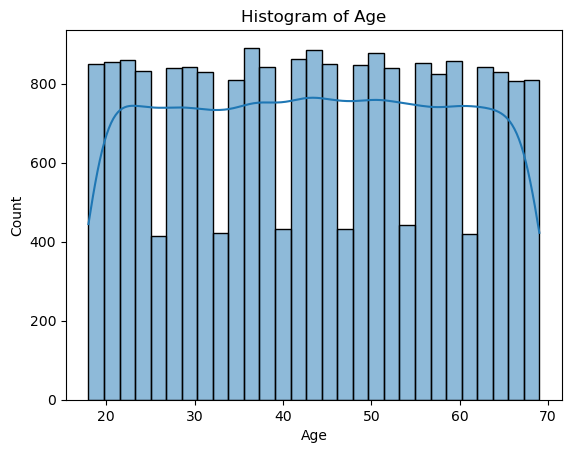

/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


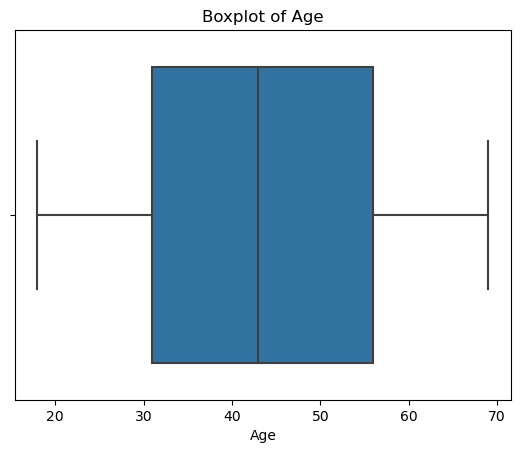

In [21]:
#VISUALIZATION OF COLUMN AGE

sns.histplot(project_cleaned['Age'], kde=True)
plt.title("Histogram of Age")
plt.show()

sns.boxplot(project_cleaned['Age'])
plt.title("Boxplot of Age")
plt.show()


#THIS VISUALIZATION SHOWS THE AGE IS NORMALLY DISTRIBUTED WITH NO OUTLIERS
#And the Age range is diverse

In [22]:
#TO CHECK OUTLIERS

Q1 = project_cleaned['Age'].quantile(0.25)  # First quartile
Q3 = project_cleaned['Age'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                    # Interquartile range

lower_bound = Q1 - 1.5 * IQR     # Lower boundary for outliers
upper_bound = Q3 + 1.5 * IQR     # Upper boundary for outliers

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Check for outliers
outliers = project_cleaned[(project_cleaned['Age'] < lower_bound) | (project_cleaned['Age'] > upper_bound)]
print("Number of Outliers:", len(outliers))


Lower Bound: -6.5
Upper Bound: 93.5
Number of Outliers: 0


In [23]:
#FOR Annual_Income COLUMN

project_cleaned['Annual_Income'].describe()


#This shows the highest income is 199998 and min income is 20005 with average income being 109315.
#there are no outliers and the annual_Income column is slightly right skewed as mean(109315) > median(108803)

count     22000.000000
mean     109315.826364
std       52148.191928
min       20005.000000
25%       63892.250000
50%      108803.500000
75%      154939.500000
max      199998.000000
Name: Annual_Income, dtype: float64

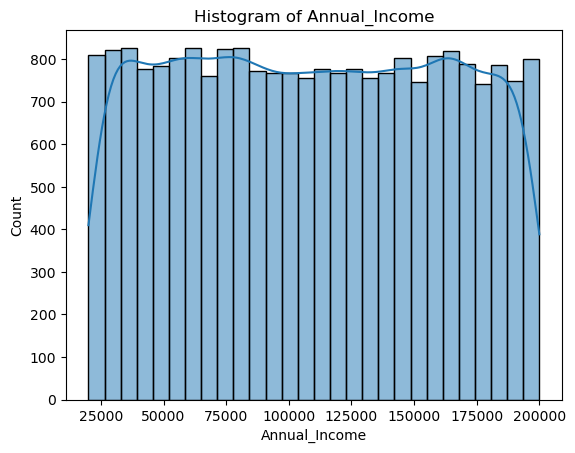

/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


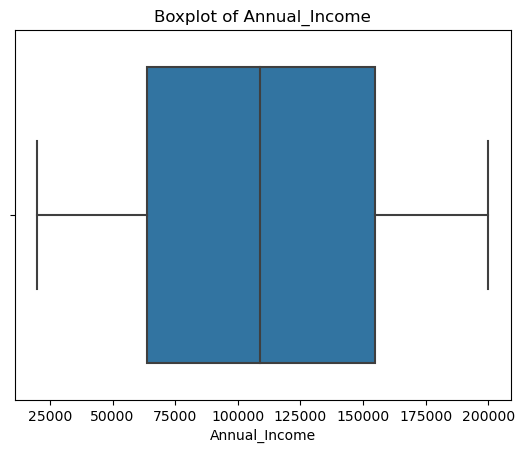

In [24]:
#VISUALIZATION OF COLUMN AAnnual_Income

sns.histplot(project_cleaned['Annual_Income'], kde=True)
plt.title("Histogram of Annual_Income")
plt.show()

sns.boxplot(project_cleaned['Annual_Income'])
plt.title("Boxplot of Annual_Income")
plt.show()


In [25]:
#TO CHECK OUTLIERS

Q1 = project_cleaned['Annual_Income'].quantile(0.25)  # First quartile
Q3 = project_cleaned['Annual_Income'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                    # Interquartile range

lower_bound = Q1 - 1.5 * IQR     # Lower boundary for outliers
upper_bound = Q3 + 1.5 * IQR     # Upper boundary for outliers

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Check for outliers
outliers = project_cleaned[(project_cleaned['Annual_Income'] < lower_bound) | (project_cleaned['Annual_Income'] > upper_bound)]
print("Number of Outliers:", len(outliers))


Lower Bound: -72678.625
Upper Bound: 291510.375
Number of Outliers: 0


In [26]:
#FOR Spending_Score COLUMN

project_cleaned['Spending_Score'].describe()

#This shows the max spending score is 100 and min is 1 with average score being 51.
#Also themean and median are almost same which mean it is normally distributed with no outliers.

count    22000.000000
mean        50.585273
std         28.949343
min          1.000000
25%         25.000000
50%         51.000000
75%         75.000000
max        100.000000
Name: Spending_Score, dtype: float64

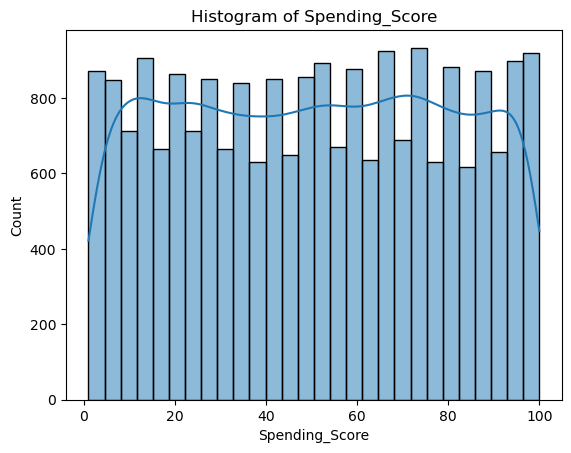

/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


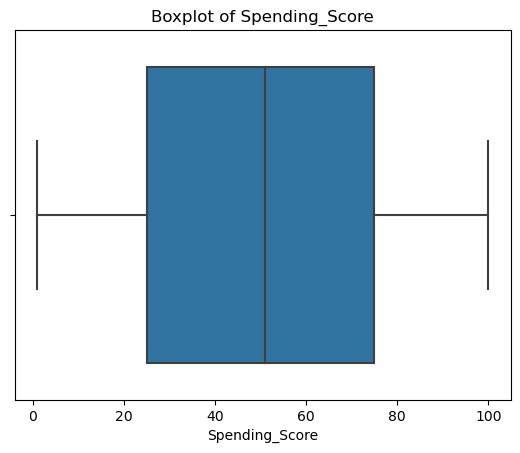

In [27]:
#VISUALIZATION OF COLUMN Spending_Score

sns.histplot(project_cleaned['Spending_Score'], kde=True)
plt.title("Histogram of Spending_Score")
plt.show()

sns.boxplot(project_cleaned['Spending_Score'])
plt.title("Boxplot of Spending_Score")
plt.show()


In [28]:
#VISUALIZATION OF COLUMN YEARS_AS_CUSTOMER

project_cleaned['Years_as_Customer'].describe()

count    22000.000000
mean         7.498682
std          4.014972
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         14.000000
Name: Years_as_Customer, dtype: float64

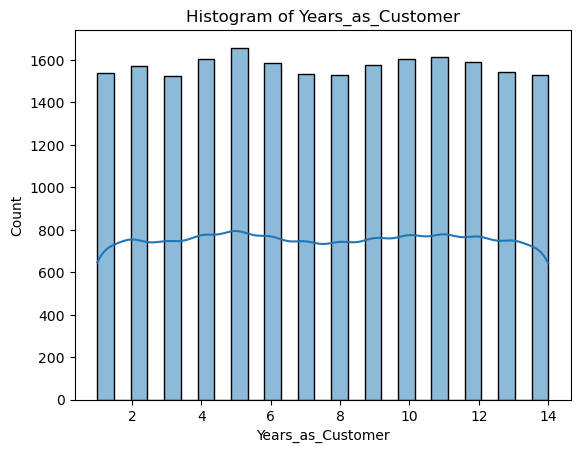

/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


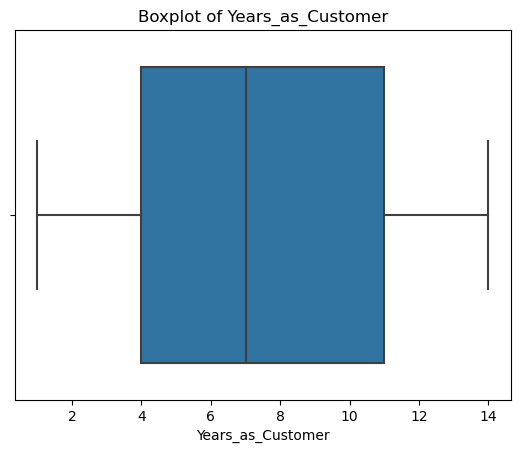

In [29]:
#VISUALIZATION OF Years_As_Customer

sns.histplot(project_cleaned['Years_as_Customer'], kde=True)
plt.title("Histogram of Years_as_Customer")
plt.show()

sns.boxplot(project_cleaned['Years_as_Customer'])
plt.title("Boxplot of Years_as_Customer")
plt.show()


#This shows that min year spent by a customer is 1 and max year is 14. with a mean of 7 years.
#This data is normally distributed as the mean and median are equal.

In [30]:
#TO CHECK OUTLIERS

Q1 = project_cleaned['Years_as_Customer'].quantile(0.25)  # First quartile
Q3 = project_cleaned['Years_as_Customer'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                    # Interquartile range

lower_bound = Q1 - 1.5 * IQR     # Lower boundary for outliers
upper_bound = Q3 + 1.5 * IQR     # Upper boundary for outliers

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Check for outliers
outliers = project_cleaned[(project_cleaned['Years_as_Customer'] < lower_bound) | (project_cleaned['Years_as_Customer'] > upper_bound)]
print("Number of Outliers:", len(outliers))


Lower Bound: -6.5
Upper Bound: 21.5
Number of Outliers: 0


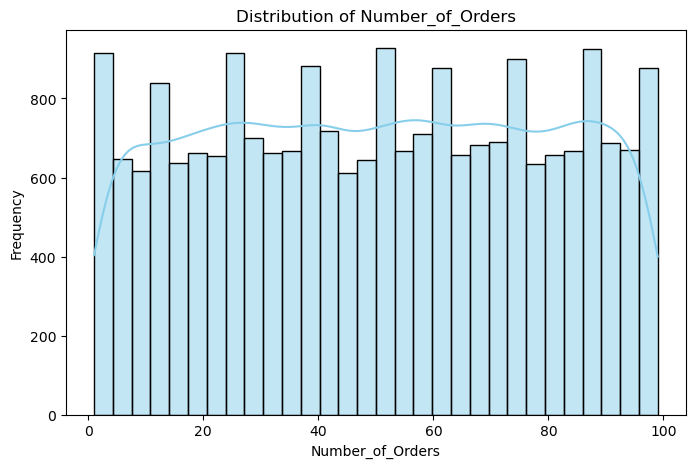

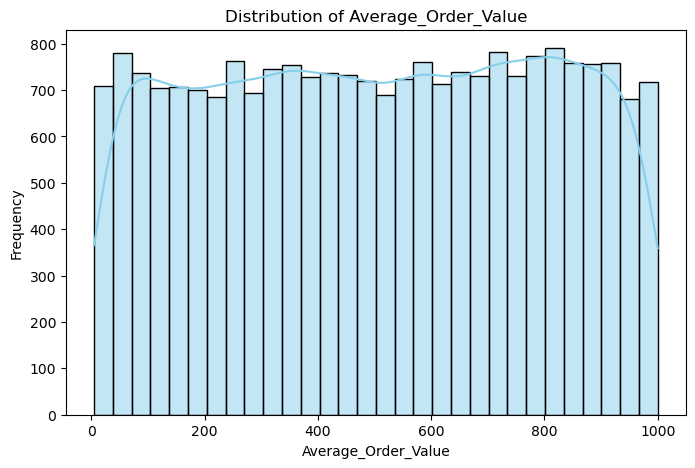

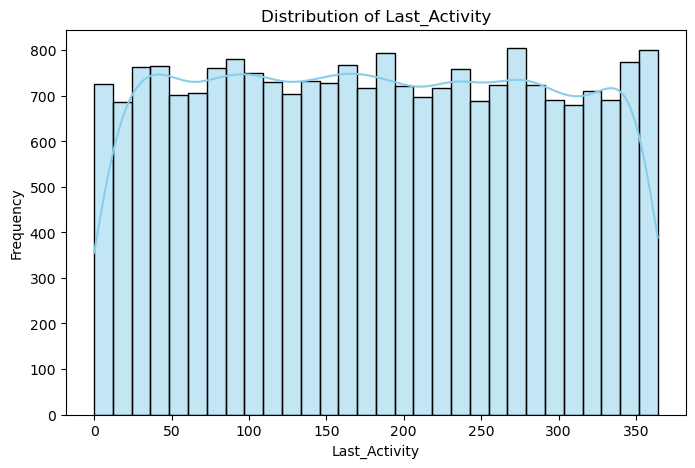

In [31]:
numerical_features = ['Number_of_Orders','Average_Order_Value','Last_Activity']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(project_cleaned[feature], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [32]:
project_cleaned['Number_of_Orders'].describe()

count    22000.000000
mean        50.255136
std         28.491824
min          1.000000
25%         26.000000
50%         50.000000
75%         75.000000
max         99.000000
Name: Number_of_Orders, dtype: float64

In [33]:
project_cleaned['Average_Order_Value'].describe()

count    22000.000000
mean       505.588996
std        287.068153
min          5.050000
25%        257.625000
50%        507.005000
75%        755.670000
max        999.930000
Name: Average_Order_Value, dtype: float64

In [34]:
project_cleaned['Last_Activity'].describe()

count    22000.000000
mean       181.899591
std        105.156113
min          0.000000
25%         91.000000
50%        181.000000
75%        273.000000
max        364.000000
Name: Last_Activity, dtype: float64

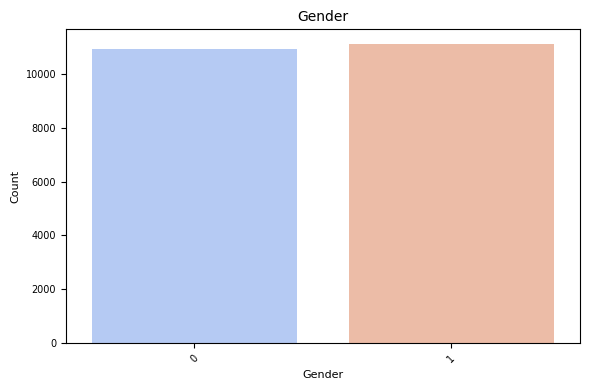

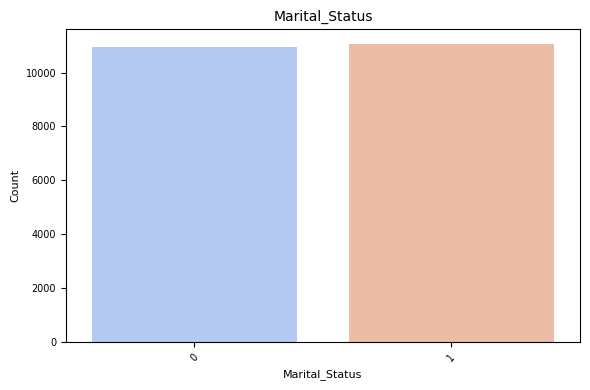

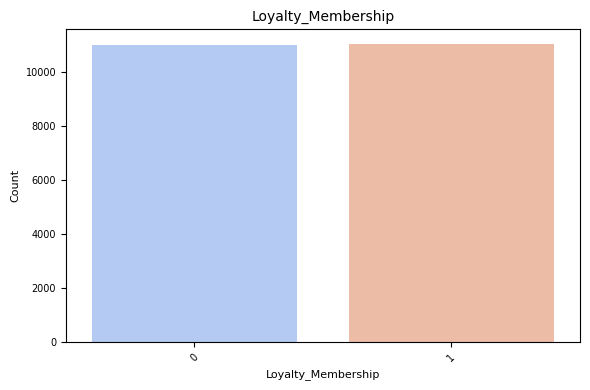

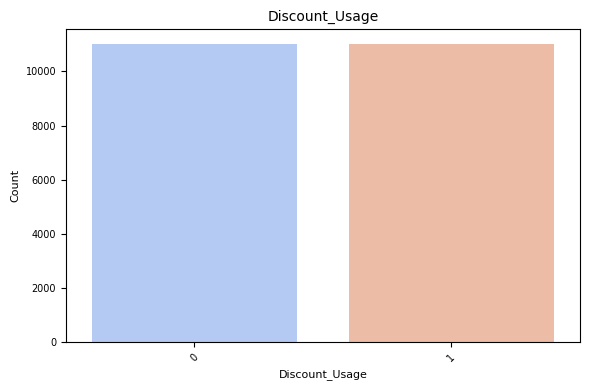

In [35]:
categorical_features = ['Gender', 'Marital_Status', 'Loyalty_Membership', 'Discount_Usage']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))  # Smaller figure size
    sns.countplot(data=project_cleaned, x=feature, palette='coolwarm')
    plt.title(f"{feature}", fontsize=10)  # Keep the title simple and small
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.xticks(rotation=45, fontsize=7)  # Smaller font for tick labels
    plt.yticks(fontsize=7)
    plt.tight_layout()  # Ensure no overlapping elements
    plt.show()


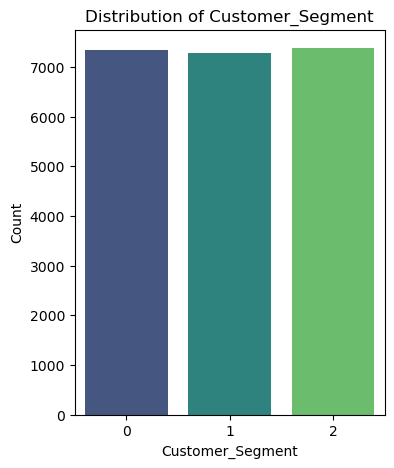

In [36]:
#TO CHECK THE DISTRIBUTION OF TARGET VARIABLE.

plt.figure(figsize=(4, 5))
sns.countplot(data=project_cleaned, x='Customer_Segment', palette='viridis')
plt.title("Distribution of Customer_Segment")
plt.xlabel("Customer_Segment")
plt.ylabel("Count")
plt.show()


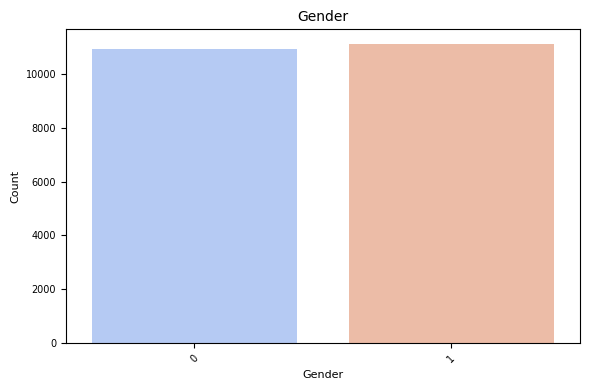

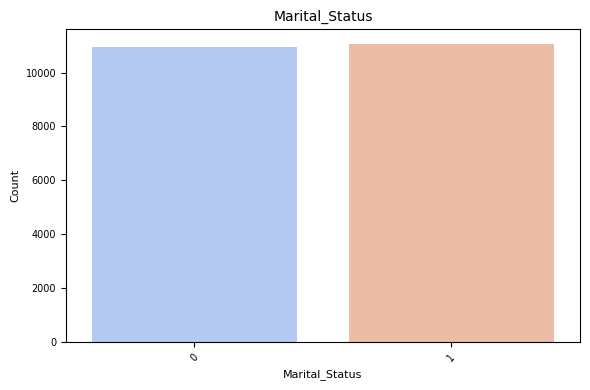

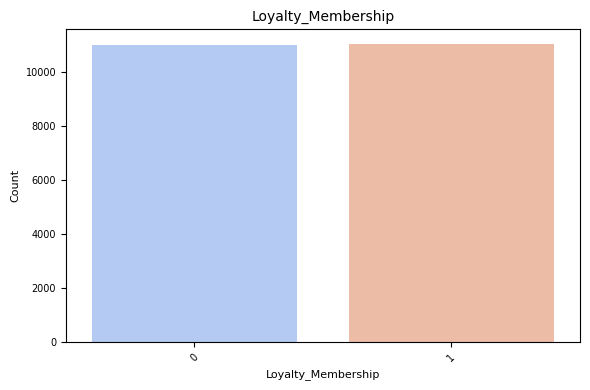

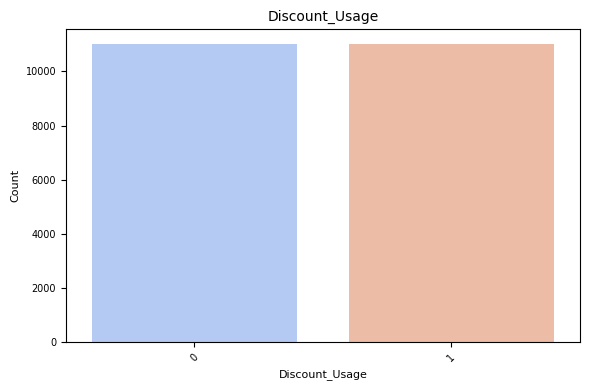

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['Gender', 'Marital_Status', 'Loyalty_Membership', 'Discount_Usage']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))  # Smaller figure size
    sns.countplot(data=project_cleaned, x=feature, palette='coolwarm')
    plt.title(f"{feature}", fontsize=10)  # Keep the title simple and small
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.xticks(rotation=45, fontsize=7)  # Smaller font for tick labels
    plt.yticks(fontsize=7)
    plt.tight_layout()  # Ensure no overlapping elements
    plt.show()


#BIVARIATE ANALYSIS

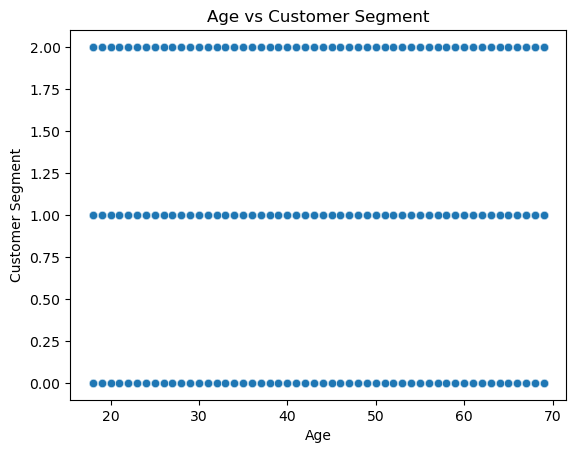

In [38]:
#NUMERICAL FEATURES
#AGE V/S CUSTOMER_SEGMENT


sns.scatterplot(data=project_cleaned, x='Age', y='Customer_Segment', alpha=0.6)
plt.title('Age vs Customer Segment')
plt.xlabel('Age')
plt.ylabel('Customer Segment')
plt.show()


#This shows age does not impact customer_segment strongly as 
#all age groups are represented in each segment without clear clustering or trends.





In [39]:
#FOR STATISTICAL ANALYSIS

import scipy.stats as stats

# Perform ANOVA test
unique_segments = project_cleaned['Customer_Segment'].unique()
age_groups = [project_cleaned['Age'][project_cleaned['Customer_Segment'] == segment] for segment in unique_segments]

f_stat, p_value = stats.f_oneway(*age_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The means of Age differ significantly across Customer Segments.")
else:
    print("No significant difference in Age means across Customer Segments.")


#This means Age column does not significantly influence the customer segmentation.

ANOVA F-statistic: 0.5579053520831243
P-value: 0.5724148990637358
No significant difference in Age means across Customer Segments.


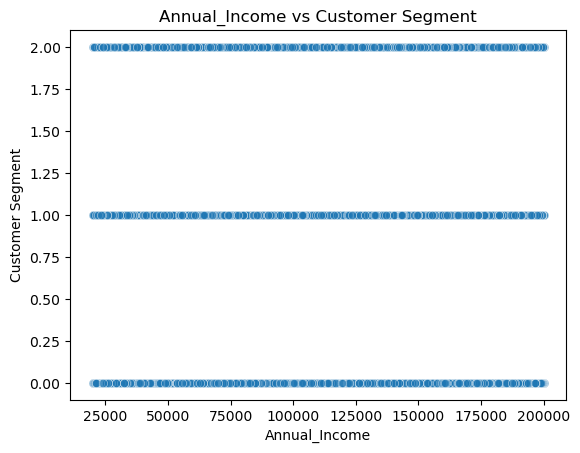

In [40]:
#ANNUAL_INCOME V/S CUSTOMER_SEGMENT

sns.scatterplot(data=project_cleaned, x='Annual_Income', y='Customer_Segment', alpha=0.6)
plt.title('Annual_Income vs Customer Segment')
plt.xlabel('Annual_Income')
plt.ylabel('Customer Segment')
plt.show()


In [41]:
#FOR STATISTICAL ANALYSIS


import scipy.stats as stats

# Perform ANOVA test
unique_segments = project_cleaned['Customer_Segment'].unique()
annual_income_groups = [project_cleaned['Annual_Income'][project_cleaned['Customer_Segment'] == segment] for segment in unique_segments]

f_stat, p_value = stats.f_oneway(*annual_income_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The means of Annual_Income differ significantly across Customer Segments.")
else:
    print("No significant difference in Annual_Income means across Customer Segments.")

    
#THIS MEANS ANNUAL_INCOME DOES NOT HAVE SIGNIFICANT IMPACT

ANOVA F-statistic: 0.15552896060826774
P-value: 0.8559632286415633
No significant difference in Annual_Income means across Customer Segments.


In [42]:
project_cleaned.columns

Index(['Age', 'Gender', 'Annual_Income', 'Spending_Score', 'Marital_Status',
       'Years_as_Customer', 'Number_of_Orders', 'Average_Order_Value',
       'Loyalty_Membership', 'Discount_Usage', 'Preferred_Delivery_Option',
       'Last_Activity', 'Review_Score', 'Customer_Segment',
       'Product_Category_Beauty', 'Product_Category_Electronics',
       'Product_Category_Fashion', 'Product_Category_Home',
       'Product_Category_Sports', 'Preferred_Payment_Method_Credit Card',
       'Preferred_Payment_Method_Debit Card',
       'Preferred_Payment_Method_Net Banking',
       'Preferred_Payment_Method_PayPal', 'Device_Used_Desktop',
       'Device_Used_Mobile', 'Device_Used_Tablet', 'Customer_Region_Asia',
       'Customer_Region_Europe', 'Customer_Region_North America',
       'Customer_Region_South America'],
      dtype='object')

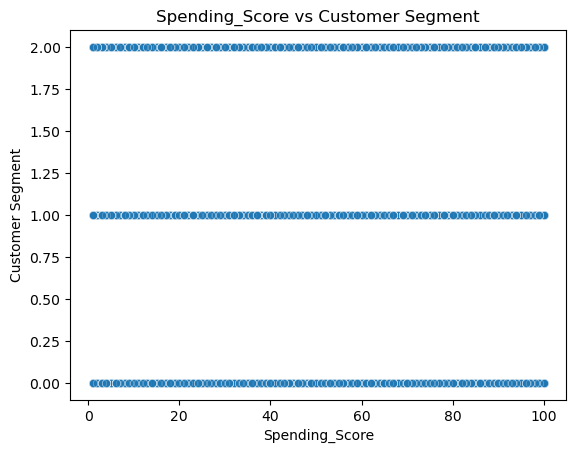

In [43]:
#SPENDING_SCORE V/S CUSTOMER_SEGMENT

sns.scatterplot(data=project_cleaned, x='Spending_Score', y='Customer_Segment', alpha=0.6)
plt.title('Spending_Score vs Customer Segment')
plt.xlabel('Spending_Score')
plt.ylabel('Customer Segment')
plt.show()


In [44]:
#FOR STATISTICAL ANALYSIS




# Perform ANOVA test
unique_segments = project_cleaned['Customer_Segment'].unique()
spending_score_groups = [project_cleaned['Spending_Score'][project_cleaned['Customer_Segment'] == segment] for segment in unique_segments]

f_stat, p_value = stats.f_oneway(*spending_score_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The means of Spending_Score differ significantly across Customer Segments.")
else:
    print("No significant difference in Spending_Score means across Customer Segments.")

#This shows no significant difference in spending_score across customer segments.

ANOVA F-statistic: 1.939076578841523
P-value: 0.14386129601672823
No significant difference in Spending_Score means across Customer Segments.


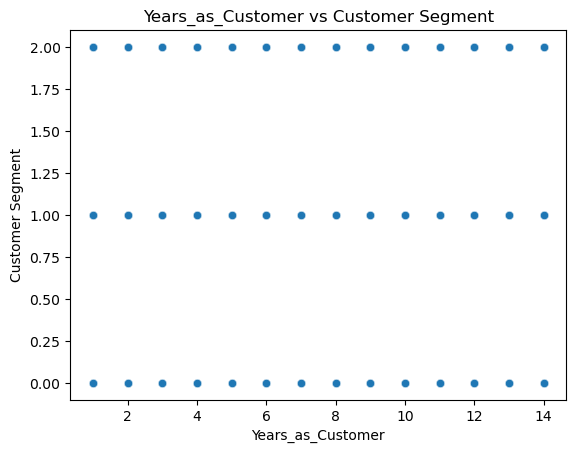

In [45]:
#YEARS_AS_CUSTOMER V/S CUSTOMER SEGMENT

sns.scatterplot(data=project_cleaned, x='Years_as_Customer', y='Customer_Segment', alpha=0.6)
plt.title('Years_as_Customer vs Customer Segment')
plt.xlabel('Years_as_Customer')
plt.ylabel('Customer Segment')
plt.show()


In [46]:
#FOR STATISTICAL ANALYSIS




# Perform ANOVA test
unique_segments = project_cleaned['Customer_Segment'].unique()
years_as_customer_groups = [project_cleaned['Years_as_Customer'][project_cleaned['Customer_Segment'] == segment] for segment in unique_segments]

f_stat, p_value = stats.f_oneway(*years_as_customer_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The means of Years_as_Customer differ significantly across Customer Segments.")
else:
    print("No significant difference in Years_as_Customer means across Customer Segments.")


ANOVA F-statistic: 2.016941061841766
P-value: 0.1330864784954501
No significant difference in Years_as_Customer means across Customer Segments.


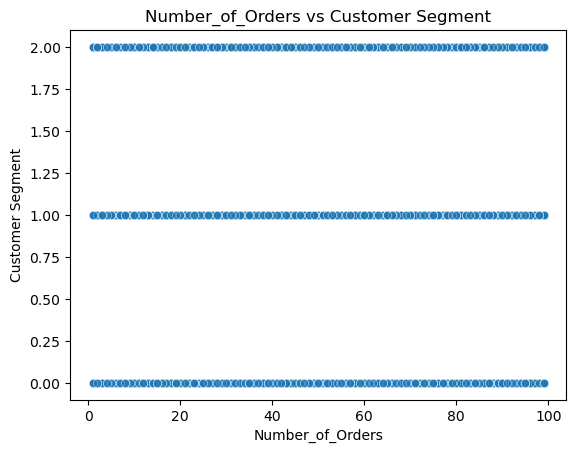

In [47]:
#NUMBER_OF_ORDERS V/S CUSTOMER SEGMENT

sns.scatterplot(data=project_cleaned, x='Number_of_Orders', y='Customer_Segment', alpha=0.6)
plt.title('Number_of_Orders vs Customer Segment')
plt.xlabel('Number_of_Orders')
plt.ylabel('Customer Segment')
plt.show()

In [48]:
#FOR STATISTICAL ANALYSIS




# Perform ANOVA test
unique_segments = project_cleaned['Customer_Segment'].unique()
number_of_orders_groups = [project_cleaned['Number_of_Orders'][project_cleaned['Customer_Segment'] == segment] for segment in unique_segments]

f_stat, p_value = stats.f_oneway(*number_of_orders_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The means of Number_of_Orders differ significantly across Customer Segments.")
else:
    print("No significant difference in Number_of_Orders means across Customer Segments.")


ANOVA F-statistic: 0.3264008235848747
P-value: 0.7215194233006462
No significant difference in Number_of_Orders means across Customer Segments.


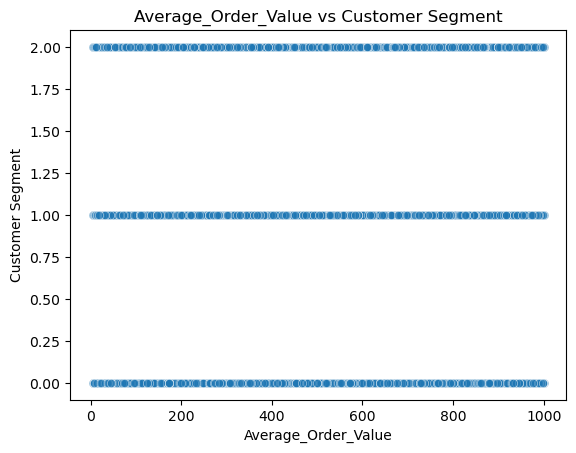

In [49]:
#Average_Order_Value V/S CUSTOMER_SEGMENT

sns.scatterplot(data=project_cleaned, x='Average_Order_Value', y='Customer_Segment', alpha=0.6)
plt.title('Average_Order_Value vs Customer Segment')
plt.xlabel('Average_Order_Value')
plt.ylabel('Customer Segment')
plt.show()


In [50]:
#FOR STATISTICAL ANALYSIS




# Perform ANOVA test
unique_segments = project_cleaned['Customer_Segment'].unique()
avg_order_value_groups = [project_cleaned['Average_Order_Value'][project_cleaned['Customer_Segment'] == segment] for segment in unique_segments]

f_stat, p_value = stats.f_oneway(*avg_order_value_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The means of Average_Order_Value differ significantly across Customer Segments.")
else:
    print("No significant difference in Average_order_Value means across Customer Segments.")


ANOVA F-statistic: 1.0078313698168426
P-value: 0.3650265468086278
No significant difference in Average_order_Value means across Customer Segments.


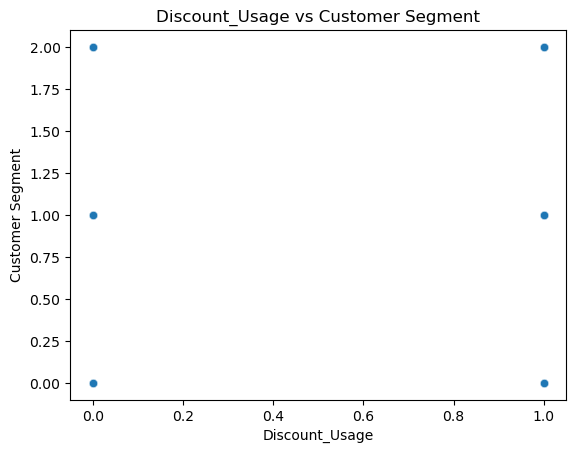

In [51]:
#DISCOUNT_USAGE V/S CUSTOMER_SEGMENT

sns.scatterplot(data=project_cleaned, x='Discount_Usage', y='Customer_Segment', alpha=0.6)
plt.title('Discount_Usage vs Customer Segment')
plt.xlabel('Discount_Usage')
plt.ylabel('Customer Segment')
plt.show()


In [52]:
#FOR STATISTICAL ANALYSIS

#CHI-SQUARE TEST(AS THERE ARE TWO CATEGORICAL FEATURES)
contingency_table = pd.crosstab(project_cleaned['Customer_Segment'], project_cleaned['Discount_Usage'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)



#Given the p-value is much larger than 0.05, 
#there is no evidence to suggest a significant relationship between customer_segment and discount_usage in the dataset. 
#This implies that the usage of discounts does not significantly vary across different customer segments.


Chi-Square Test Results:
Chi-Square Statistic: 1.79551399507517
P-Value: 0.4074826199918232
Degrees of Freedom: 2
Expected Frequencies:
[[3668.00009091 3665.99990909]
 [3644.99381818 3643.00618182]
 [3690.00609091 3687.99390909]]


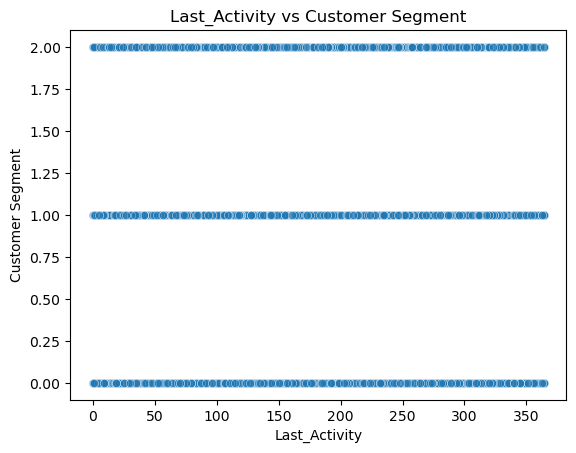

In [53]:
#LAST_ACTIVITY V/S CUSTOMER_SEGMENT

sns.scatterplot(data=project_cleaned, x='Last_Activity', y='Customer_Segment', alpha=0.6)
plt.title('Last_Activity vs Customer Segment')
plt.xlabel('Last_Activity')
plt.ylabel('Customer Segment')
plt.show()

In [54]:
#FOR STATISTICAL ANALYSIS




# Perform ANOVA test
unique_segments = project_cleaned['Customer_Segment'].unique()
last_activity_groups = [project_cleaned['Last_Activity'][project_cleaned['Customer_Segment'] == segment] for segment in unique_segments]

f_stat, p_value = stats.f_oneway(*last_activity_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The means of Last_Activity differ significantly across Customer Segments.")
else:
    print("No significant difference in Last_Activity means across Customer Segments.")


ANOVA F-statistic: 0.03784803753406953
P-value: 0.962859310941748
No significant difference in Last_Activity means across Customer Segments.


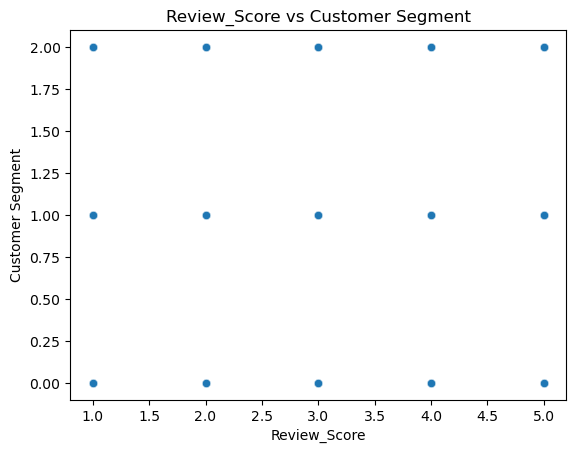

In [55]:
#REVIEW_SCORE V/S CUSTOMER_SEGMENT

sns.scatterplot(data=project_cleaned, x='Review_Score', y='Customer_Segment', alpha=0.6)
plt.title('Review_Score vs Customer Segment')
plt.xlabel('Review_Score')
plt.ylabel('Customer Segment')
plt.show()

In [56]:
#FOR STATISTICAL ANALYSIS




# Perform ANOVA test
unique_segments = project_cleaned['Customer_Segment'].unique()
review_score_groups = [project_cleaned['Review_Score'][project_cleaned['Customer_Segment'] == segment] for segment in unique_segments]

f_stat, p_value = stats.f_oneway(*review_score_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The means of Review_Score differ significantly across Customer Segments.")
else:
    print("No significant difference in Review_Score means across Customer Segments.")


ANOVA F-statistic: 1.6345338279135335
P-value: 0.19506696240206065
No significant difference in Review_Score means across Customer Segments.


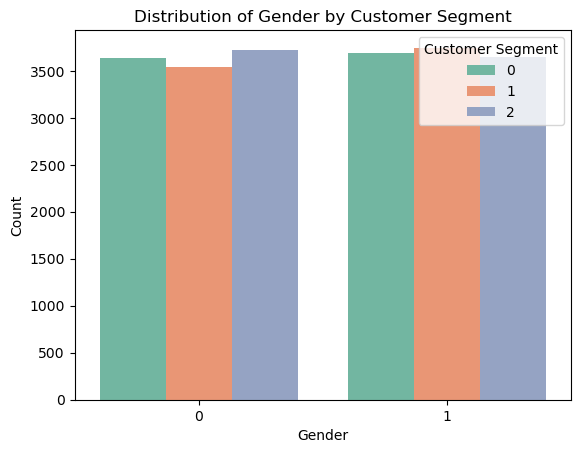

In [57]:
#CATEGORICAL FEATURES

#GENDER V/S CUSTOMER_SEGMENT

feature_name= 'Gender'
# Bar chart
sns.countplot(data=project_cleaned, x='Gender', hue='Customer_Segment', palette='Set2')
plt.title(f'Distribution of {feature_name} by Customer Segment')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Customer Segment', loc='upper right')
plt.show()


In [57]:
#STATISTICAL ANALYSIS(CHI-SQUARE TEST AS BOTH ARE CATEGORICAL FEATURES)

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(project_cleaned['Gender'], project_cleaned['Customer_Segment'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
if p < 0.05:
    print("Conclusion: There is a significant association between Gender and Customer Segment.")
else:
    print("Conclusion: There is no significant association between Gender and Customer Segment.")

    
    
#This shows there is no significant association between gender and target variable.

Contingency Table:
Customer_Segment     0     1     2
Gender                            
0                 3639  3542  3727
1                 3695  3746  3651

Chi-Square Test Results:
Chi-Square Statistic: 5.3821
P-Value: 0.0678
Degrees of Freedom: 2
Conclusion: There is no significant association between Gender and Customer Segment.


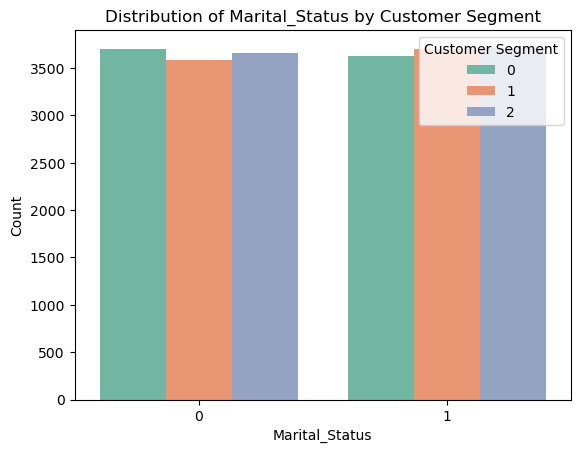

In [58]:
#MARITAL_STATUS V/S CUSTOMER_SEGMENT

feature_name= 'Marital_Status'
# Bar chart
sns.countplot(data=project_cleaned, x='Marital_Status', hue='Customer_Segment', palette='Set2')
plt.title(f'Distribution of {feature_name} by Customer Segment')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.legend(title='Customer Segment', loc='upper right')
plt.show()

In [59]:
#STATISTICAL ANALYSIS

from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(project_cleaned['Marital_Status'], project_cleaned['Customer_Segment'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
if p < 0.05:
    print("Conclusion: There is a significant association between Marital_Status and Customer Segment.")
else:
    print("Conclusion: There is no significant association between Marital_Status and Customer Segment.")

    
    
#This shows there is no significant relation ship between the two    

Contingency Table:
Customer_Segment     0     1     2
Marital_Status                    
0                 3705  3585  3663
1                 3629  3703  3715

Chi-Square Test Results:
Chi-Square Statistic: 2.6630
P-Value: 0.2641
Degrees of Freedom: 2
Conclusion: There is no significant association between Marital_Status and Customer Segment.


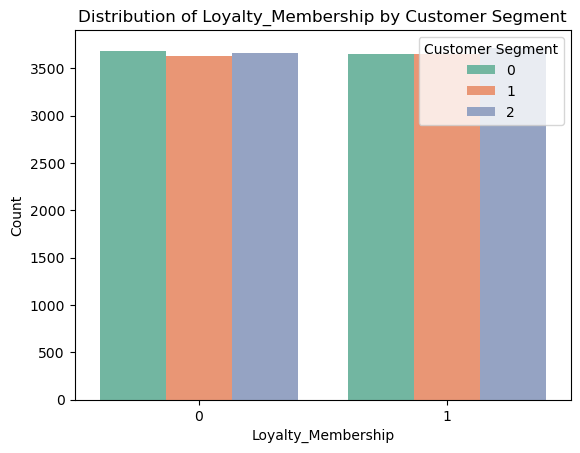

In [60]:
#LOYALTY_MEMBERSHIP V/S CUSTOMER_SEGMENT


feature_name= 'Loyalty_Membership'
# Bar chart
sns.countplot(data=project_cleaned, x='Loyalty_Membership', hue='Customer_Segment', palette='Set2')
plt.title(f'Distribution of {feature_name} by Customer Segment')
plt.xlabel('Loyalty_Membership')
plt.ylabel('Count')
plt.legend(title='Customer Segment', loc='upper right')
plt.show()

In [61]:
#STATISTICAL ANALYSIS

# Create a contingency table
contingency_table = pd.crosstab(project_cleaned['Loyalty_Membership'], project_cleaned['Customer_Segment'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
if p < 0.05:
    print("Conclusion: There is a significant association between Loyalty_Membership and Customer Segment.")
else:
    print("Conclusion: There is no significant association between Loyalty_Membership and Customer Segment.")

    
    
#This shows there is no significant relation ship between the two .   

Contingency Table:
Customer_Segment       0     1     2
Loyalty_Membership                  
0                   3687  3635  3659
1                   3647  3653  3719

Chi-Square Test Results:
Chi-Square Statistic: 0.6849
P-Value: 0.7100
Degrees of Freedom: 2
Conclusion: There is no significant association between Loyalty_Membership and Customer Segment.


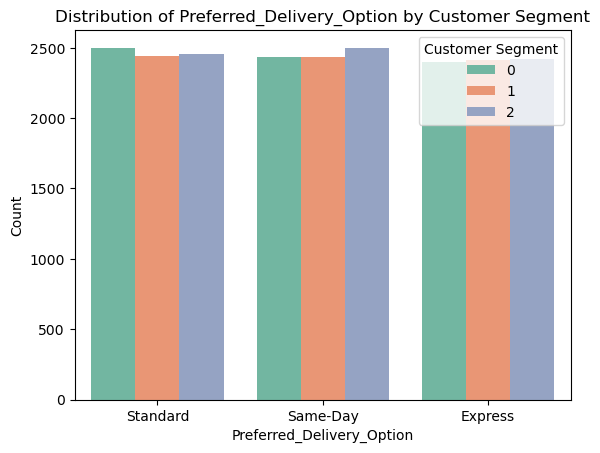

In [62]:
#Preferred_Delivery_Option V/S CUSTOMER_SEGMENT

feature_name= 'Preferred_Delivery_Option'
# Bar chart
sns.countplot(data=project_cleaned, x='Preferred_Delivery_Option', hue='Customer_Segment', palette='Set2')
plt.title(f'Distribution of {feature_name} by Customer Segment')
plt.xlabel('Preferred_Delivery_Option')
plt.ylabel('Count')
plt.legend(title='Customer Segment', loc='upper right')
plt.show()

In [63]:
#STATISTICAL ANALYSIS

# Create a contingency table
contingency_table = pd.crosstab(project_cleaned['Preferred_Delivery_Option'], project_cleaned['Customer_Segment'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
if p < 0.05:
    print("Conclusion: There is a significant association between Preferred_Delivery_Option and Customer Segment.")
else:
    print("Conclusion: There is no significant association between Preferred_Delivery_Option and Customer Segment.")

    
    
#This shows there is no significant relation ship between the two .   

Contingency Table:
Customer_Segment              0     1     2
Preferred_Delivery_Option                  
Express                    2401  2414  2423
Same-Day                   2433  2434  2501
Standard                   2500  2440  2454

Chi-Square Test Results:
Chi-Square Statistic: 1.5826
P-Value: 0.8119
Degrees of Freedom: 4
Conclusion: There is no significant association between Preferred_Delivery_Option and Customer Segment.


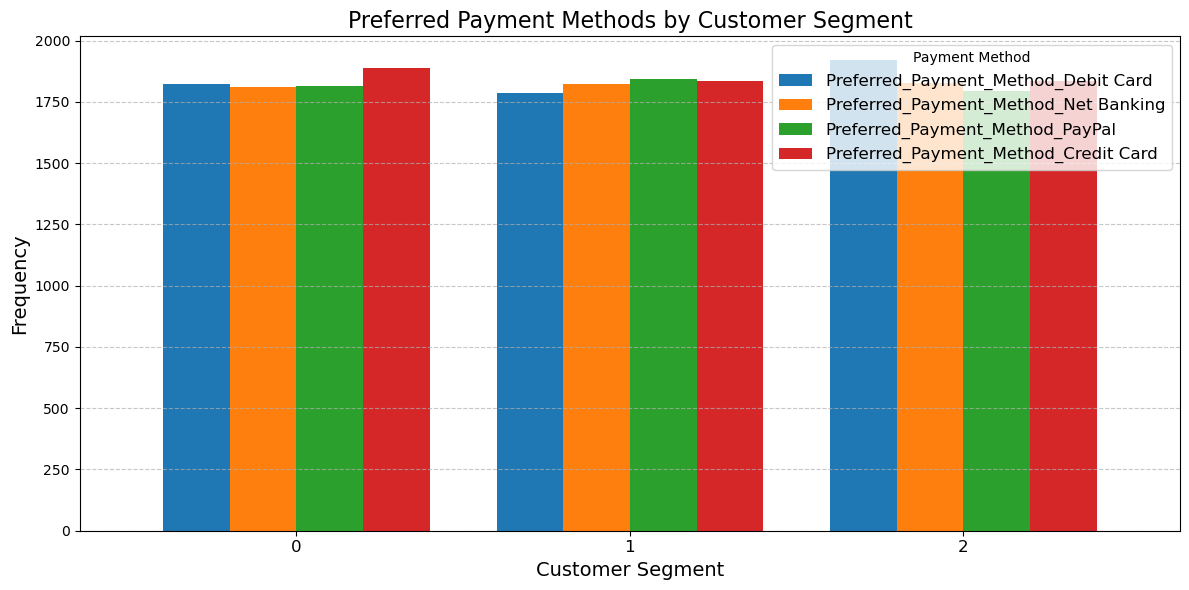

In [64]:
#PAYMENT_METHODS V/S CUSTOMER_SEGMENT





# Filter relevant columns
payment_columns = [
    'Preferred_Payment_Method_Debit Card',
    'Preferred_Payment_Method_Net Banking',
    'Preferred_Payment_Method_PayPal',
    'Preferred_Payment_Method_Credit Card'
]

# Summing payment methods by customer segment
payment_segment_analysis = project_cleaned.groupby('Customer_Segment')[payment_columns].sum()

# Plot a grouped bar chart
ax = payment_segment_analysis.plot(kind='bar', figsize=(12, 6), width=0.8)

# Customize the chart
plt.title('Preferred Payment Methods by Customer Segment', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Customer Segment', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Payment Method', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


In [65]:
#STATISTICAL ANALYSIS


# Define relevant columns for the analysis
payment_columns = [
    'Preferred_Payment_Method_Debit Card',
    'Preferred_Payment_Method_Net Banking',
    'Preferred_Payment_Method_PayPal',
    'Preferred_Payment_Method_Credit Card'
]

# Group by Customer Segment and sum payment method frequencies
payment_segment_analysis = project_cleaned.groupby('Customer_Segment')[payment_columns].sum()

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(payment_segment_analysis)

# Print the results
print("Chi-Square Test of Independence")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpret the p-value
if p < 0.05:
    print("Result: There is a significant association between payment methods and customer segments.")
else:
    print("Result: There is no significant association between payment methods and customer segments.")


Chi-Square Test of Independence
Chi-Square Statistic: 6.34
Degrees of Freedom: 6
P-value: 0.3863
Result: There is no significant association between payment methods and customer segments.


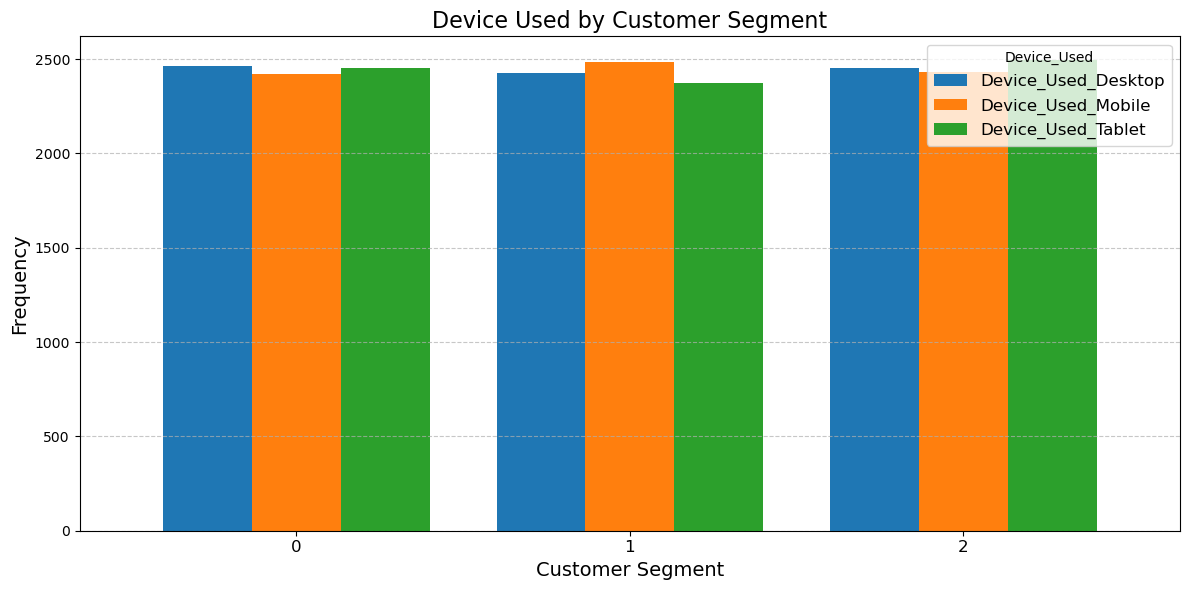

In [66]:
#DEVICE_USED V/S CUSTOMER_SEGMENT

# Filter relevant columns
device_used = [
    'Device_Used_Desktop','Device_Used_Mobile','Device_Used_Tablet'
]

# Summing payment methods by customer segment
device_used_analysis = project_cleaned.groupby('Customer_Segment')[device_used].sum()

# Plot a grouped bar chart
ax = device_used_analysis.plot(kind='bar', figsize=(12, 6), width=0.8)

# Customize the chart
plt.title('Device Used by Customer Segment', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Customer Segment', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Device_Used', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

In [67]:
#STATISTICAL ANALYSIS


# Define relevant columns for the analysis
device_used = [
    'Device_Used_Desktop','Device_Used_Mobile','Device_Used_Tablet'
]

# Group by Customer Segment and sum payment method frequencies
device_used_analysis = project_cleaned.groupby('Customer_Segment')[device_used].sum()

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(device_used_analysis)

# Print the results
print("Chi-Square Test of Independence")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpret the p-value
if p < 0.05:
    print("Result: There is a significant association between Device Used and customer segments.")
else:
    print("Result: There is no significant association between Device Used and customer segments.")


Chi-Square Test of Independence
Chi-Square Statistic: 3.91
Degrees of Freedom: 4
P-value: 0.4186
Result: There is no significant association between Device Used and customer segments.


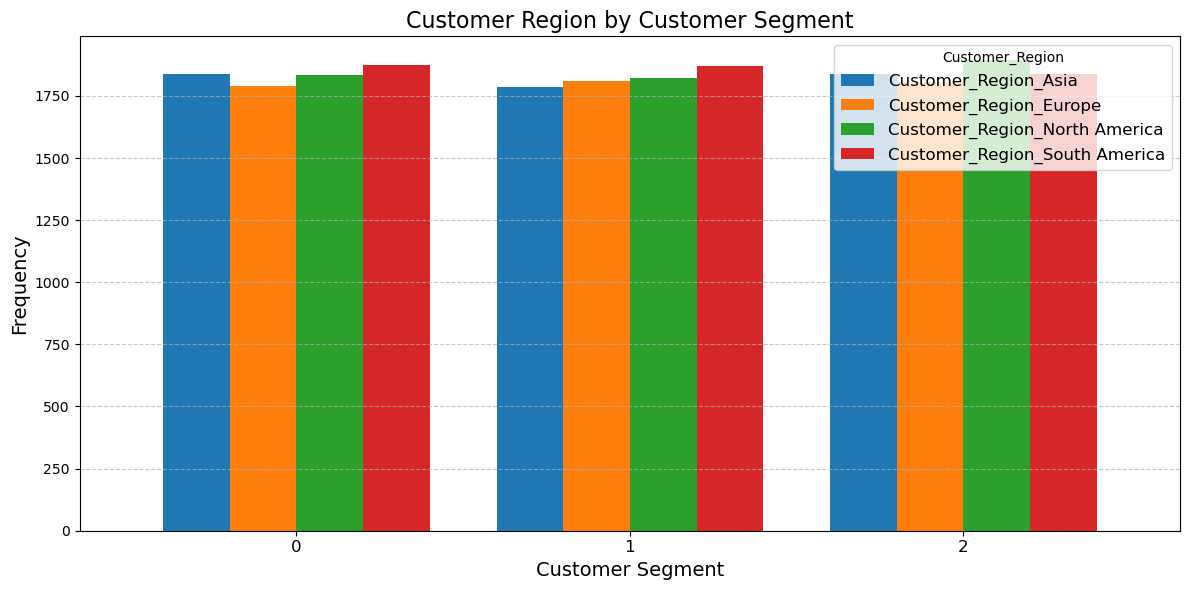

In [68]:
#CUSTOMER_REGION V/S CUSTOMER_SEGMENT

# Filter relevant columns
customer_region = [
    'Customer_Region_Asia',
       'Customer_Region_Europe','Customer_Region_North America',
       'Customer_Region_South America'
]

# Summing payment methods by customer segment
customer_region_analysis = project_cleaned.groupby('Customer_Segment')[customer_region].sum()

# Plot a grouped bar chart
ax = customer_region_analysis.plot(kind='bar', figsize=(12, 6), width=0.8)

# Customize the chart
plt.title('Customer Region by Customer Segment', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Customer Segment', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Customer_Region', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

In [69]:
#STATISTICAL ANALYSIS

#Define relevant columns for the analysis
customer_region = [
    'Customer_Region_Asia',
       'Customer_Region_Europe','Customer_Region_North America',
       'Customer_Region_South America'
]


# Group by Customer Segment and customer region frequencies
customer_region_analysis = project_cleaned.groupby('Customer_Segment')[customer_region].sum()

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(customer_region_analysis)

# Print the results
print("Chi-Square Test of Independence")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpret the p-value
if p < 0.05:
    print("Result: There is a significant association between Customer Region and customer segments.")
else:
    print("Result: There is no significant association between Customer Region and customer segments.")



Chi-Square Test of Independence
Chi-Square Statistic: 2.61
Degrees of Freedom: 6
P-value: 0.8563
Result: There is no significant association between Customer Region and customer segments.


In [70]:
project_cleaned.corr()

,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Years_as_Customer,Number_of_Orders,Average_Order_Value,Loyalty_Membership,Discount_Usage,...,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_Net Banking,Preferred_Payment_Method_PayPal,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Customer_Region_Asia,Customer_Region_Europe,Customer_Region_North America,Customer_Region_South America
Age,1.000000,-0.004771,0.000497,0.000329,0.000677,0.000114,0.005761,0.001368,8.224022e-03,-3.757186e-03,...,0.002695,-0.001415,-0.010598,-0.003752,0.007602,-0.003851,-0.000942,0.002920,-0.000529,-0.001425
Gender,-0.004771,1.000000,-0.012934,0.001844,0.003146,-0.001209,0.002412,-0.000231,7.894933e-03,-5.179719e-03,...,-0.010924,0.004457,0.004355,0.004205,-0.004180,-0.000025,-0.001649,0.002094,-0.006953,0.006506
Annual_Income,0.000497,-0.012934,1.000000,-0.003315,0.000462,0.004471,-0.015933,0.009978,-2.118010e-03,1.110366e-04,...,-0.010445,-0.000954,0.014398,0.003684,-0.006048,0.002364,-0.001163,-0.003160,-0.003054,0.007328
Spending_Score,0.000329,0.001844,-0.003315,1.000000,0.002533,0.006073,0.003815,0.004338,9.228878e-04,-9.123493e-03,...,0.009036,-0.007807,-0.001155,-0.009006,0.005707,0.003301,-0.004030,-0.002251,0.009439,-0.003196
Marital_Status,0.000677,0.003146,0.000462,0.002533,1.000000,0.003873,0.007794,0.010663,-5.528406e-04,1.036490e-02,...,-0.003105,-0.001612,-0.005506,0.000930,0.002956,-0.003887,0.008699,-0.009936,-0.002692,0.003879
Years_as_Customer,0.000114,-0.001209,0.004471,0.006073,0.003873,1.000000,0.001514,0.001508,2.898880e-03,3.621990e-04,...,-0.004038,0.005248,-0.000061,-0.008112,-0.001353,0.009469,0.001787,0.001042,-0.004735,0.001921
Number_of_Orders,0.005761,0.002412,-0.015933,0.003815,0.007794,0.001514,1.000000,-0.010573,-6.002976e-03,9.349834e-03,...,0.009467,-0.005742,-0.001156,0.003524,-0.002889,-0.000636,0.005289,0.000096,0.001645,-0.006987
Average_Order_Value,0.001368,-0.000231,0.009978,0.004338,0.010663,0.001508,-0.010573,1.000000,5.659029e-03,-1.423141e-02,...,-0.006170,0.002547,-0.003267,0.001365,0.005181,-0.006549,0.006747,-0.006601,0.004943,-0.005103
Loyalty_Membership,0.008224,0.007895,-0.002118,0.000923,-0.000553,0.002899,-0.006003,0.005659,1.000000e+00,4.710751e-07,...,0.005915,-0.004781,0.003324,0.000995,-0.002186,0.001191,-0.004570,-0.003837,-0.000795,0.009123
Discount_Usage,-0.003757,-0.005180,0.000111,-0.009123,0.010365,0.000362,0.009350,-0.014231,4.710751e-07,1.000000e+00,...,-0.006967,-0.006368,0.010577,-0.004338,-0.011763,0.016107,-0.008683,0.003641,-0.000469,0.005486


In [71]:
Pca with pca and without pca
model building(logistic regression, boost,random forest) 
feature engineering)

SyntaxError: invalid syntax (2549309462.py, line 1)

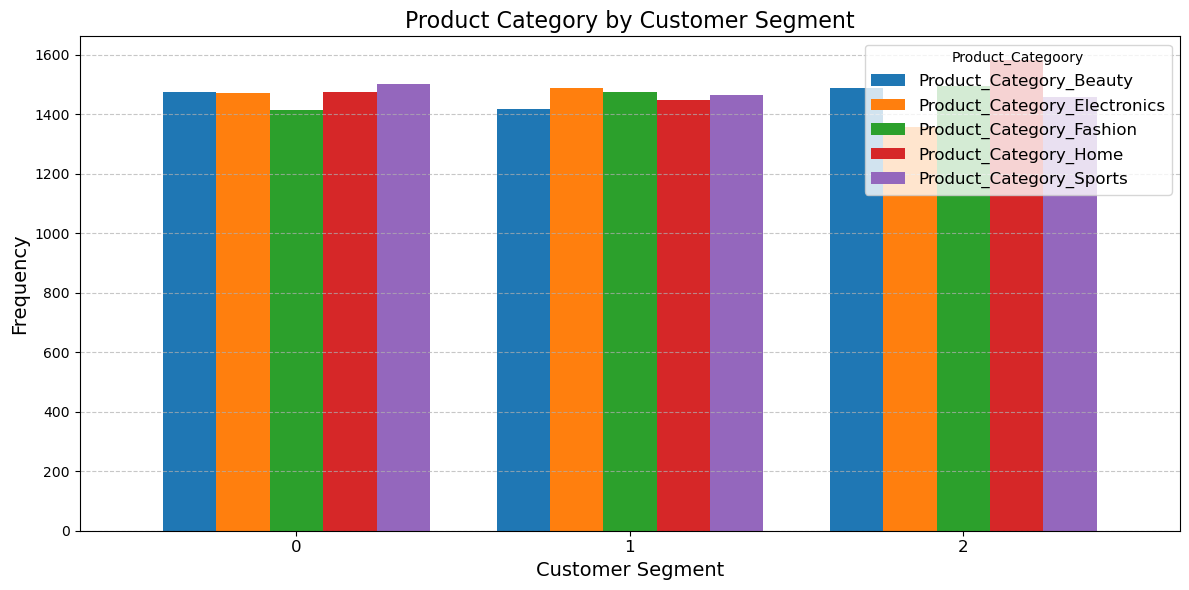

In [72]:
#PRODUCT_CATEGORY V/S CUSTOMER SEGMNET



# Filter relevant columns
product_category = [
    'Product_Category_Beauty','Product_Category_Electronics','Product_Category_Fashion',
    'Product_Category_Home','Product_Category_Sports'
]

# Summing payment methods by customer segment
product_category_analysis = project_cleaned.groupby('Customer_Segment')[product_category].sum()

# Plot a grouped bar chart
ax = product_category_analysis.plot(kind='bar', figsize=(12, 6), width=0.8)

# Customize the chart
plt.title('Product Category by Customer Segment', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Customer Segment', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Product_Categoory', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

In [73]:
#STATISTICAL ANALYSIS

#Define relevant columns for the analysis
product_category = [
    'Product_Category_Beauty','Product_Category_Electronics','Product_Category_Fashion',
    'Product_Category_Home','Product_Category_Sports'
]


# Group by Customer Segment and customer region frequencies
product_category_analysis = project_cleaned.groupby('Customer_Segment')[product_category].sum()

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(product_category_analysis)

# Print the results
print("Chi-Square Test of Independence")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpret the p-value
if p < 0.05:
    print("Result: There is a significant association between Product Catgeory and customer segments.")
else:
    print("Result: There is no significant association between Product Catgeory and customer segments.")

    
#This shows there is an association between product_category and the target variable. 
#So, lets analyze it further.

Chi-Square Test of Independence
Chi-Square Statistic: 18.02
Degrees of Freedom: 8
P-value: 0.0211
Result: There is a significant association between Product Catgeory and customer segments.


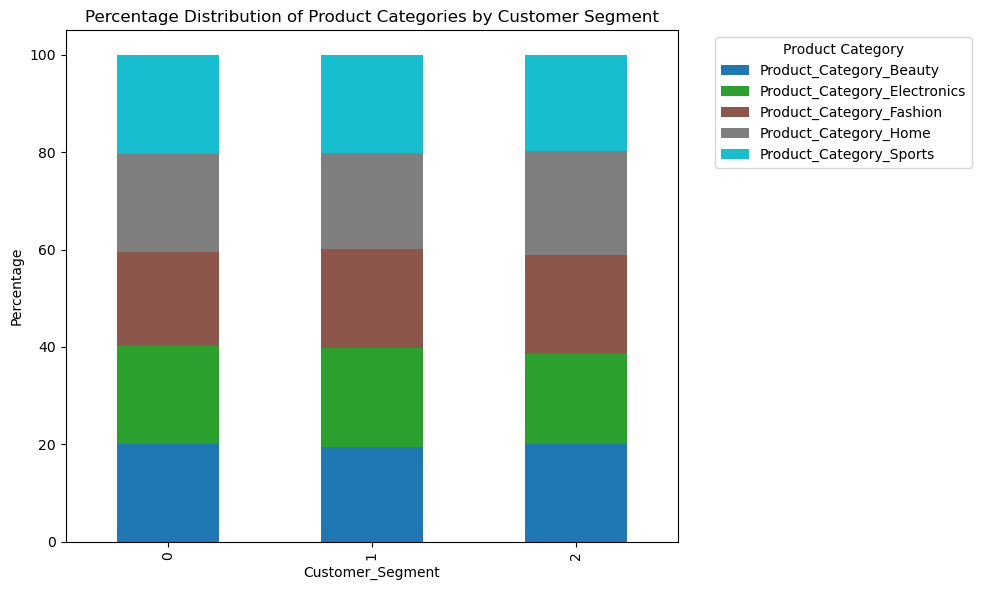

In [74]:
#Since there is an association between product_catgeory and target variable let's 
#calculate the percentage breakdown of product categories within each customer segment 
#and visualize it as a stacked bar chart





import pandas as pd
import matplotlib.pyplot as plt

# Select one-hot encoded columns related to product categories
product_category_columns = [
    'Product_Category_Beauty',
    'Product_Category_Electronics',
    'Product_Category_Fashion',
    'Product_Category_Home',
    'Product_Category_Sports'
]

# Melt the data to create a long format for easier analysis
df_melted = project_cleaned.melt(
    id_vars=['Customer_Segment'], 
    value_vars=product_category_columns, 
    var_name='Product_Category', 
    value_name='Value'
)

# Filter rows where the one-hot value is 1 (i.e., category selected)
df_melted = df_melted[df_melted['Value'] == 1]

# Calculate percentage distribution
category_percentage = (
    df_melted.groupby(['Customer_Segment', 'Product_Category'])
    .size()
    .groupby(level=0)
    .apply(lambda x: (x / x.sum()) * 100)
    .unstack()
)

# Plot a stacked bar chart
category_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='tab10')
plt.title('Percentage Distribution of Product Categories by Customer Segment')
plt.xlabel('Customer_Segment')
plt.ylabel('Percentage')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [76]:
#CHECKING CORRELATION 
#Values close to +1: Strong positive correlation.
#Values close to -1: Strong negative correlation.
#Values close to 0: Weak or no correlation.

#Negative correlation refers to a relationship between two variables in which one variable increases as the other decreases, and vice versa. 
#In statistical terms, it indicates an inverse relationship.

correlation_with_target = project_cleaned.corr()['Customer_Segment'].sort_values(ascending=False)
print(correlation_with_target)


Customer_Segment                        1.000000
Product_Category_Home                   0.013500
Preferred_Payment_Method_Debit Card     0.011140
Product_Category_Fashion                0.009914
Marital_Status                          0.007104
Customer_Region_North America           0.006256
Loyalty_Membership                      0.005554
Discount_Usage                          0.004336
Number_of_Orders                        0.004241
Device_Used_Tablet                      0.003226
Last_Activity                           0.001854
Preferred_Payment_Method_Net Banking    0.000783
Customer_Region_Europe                  0.000671
Product_Category_Beauty                 0.000451
Annual_Income                           0.000026
Age                                    -0.000174
Device_Used_Mobile                     -0.000433
Years_as_Customer                      -0.000567
Customer_Region_Asia                   -0.001148
Review_Score                           -0.001688
Spending_Score      

FEATURE ENGINEERING

In [77]:
#FEATURE ENGINEERING
#LET ME ADD SOME FEATURES AND THEN DO THE EDA AGAIN TO GAIN SOME MORE UNDERSTANDING

#Wealthier customers might spend differently compared to others.
project_cleaned['Income_Spending_Interaction'] = project_cleaned['Annual_Income'] * project_cleaned['Spending_Score']

#Long-term customers with loyalty membership might exhibit unique behaviors.
project_cleaned['Loyalty_Customer_Years'] = project_cleaned['Years_as_Customer'] * project_cleaned['Loyalty_Membership']

#High spenders who frequently order may indicate a premium customer segment.
project_cleaned['Order_Value_Frequency'] = project_cleaned['Average_Order_Value'] * project_cleaned['Number_of_Orders']

project_cleaned.columns

Index(['Age', 'Gender', 'Annual_Income', 'Spending_Score', 'Marital_Status',
       'Years_as_Customer', 'Number_of_Orders', 'Average_Order_Value',
       'Loyalty_Membership', 'Discount_Usage', 'Preferred_Delivery_Option',
       'Last_Activity', 'Review_Score', 'Customer_Segment',
       'Product_Category_Beauty', 'Product_Category_Electronics',
       'Product_Category_Fashion', 'Product_Category_Home',
       'Product_Category_Sports', 'Preferred_Payment_Method_Credit Card',
       'Preferred_Payment_Method_Debit Card',
       'Preferred_Payment_Method_Net Banking',
       'Preferred_Payment_Method_PayPal', 'Device_Used_Desktop',
       'Device_Used_Mobile', 'Device_Used_Tablet', 'Customer_Region_Asia',
       'Customer_Region_Europe', 'Customer_Region_North America',
       'Customer_Region_South America', 'Income_Spending_Interaction',
       'Loyalty_Customer_Years', 'Order_Value_Frequency'],
      dtype='object')

In [78]:
project_cleaned.tail(15)

,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Years_as_Customer,Number_of_Orders,Average_Order_Value,Loyalty_Membership,Discount_Usage,...,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Customer_Region_Asia,Customer_Region_Europe,Customer_Region_North America,Customer_Region_South America,Income_Spending_Interaction,Loyalty_Customer_Years,Order_Value_Frequency
21985,38,1,64345,74,1,5,12,18.67,0,0,...,0,1,0,0,0,1,0,4761530,0,224.04
21986,44,1,111278,93,0,7,35,572.42,1,1,...,0,0,1,0,1,0,0,10348854,7,20034.70
21987,65,0,97953,21,0,10,65,503.74,0,1,...,0,0,1,0,0,0,1,2057013,0,32743.10
21988,33,1,140233,76,1,2,28,725.91,0,0,...,0,0,1,0,1,0,0,10657708,0,20325.48
21989,40,0,107093,24,1,7,99,653.31,1,1,...,0,1,0,0,1,0,0,2570232,7,64677.69
21990,67,0,69817,55,0,6,19,520.46,1,0,...,0,0,1,0,0,0,1,3839935,6,9888.74
21991,64,0,55416,49,1,12,15,729.62,1,1,...,0,1,0,0,0,0,1,2715384,12,10944.30
21992,56,0,55748,29,0,10,10,951.88,1,1,...,0,1,0,0,1,0,0,1616692,10,9518.80
21993,29,0,122466,7,0,5,61,769.12,0,1,...,0,1,0,0,0,1,0,857262,0,46916.32
21994,65,1,143523,69,1,10,75,110.26,0,0,...,0,1,0,0,0,0,1,9903087,0,8269.50


In [79]:
#Calculating orders per year to standardize customer behavior
project_cleaned['Orders_per_Year'] = project_cleaned['Number_of_Orders'] / project_cleaned['Years_as_Customer']

#Ratio of Spending_Score to Average_Order_Value.
project_cleaned['Spending_Efficiency'] = project_cleaned['Spending_Score'] / project_cleaned['Average_Order_Value']


In [80]:
project_cleaned.head()

,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Years_as_Customer,Number_of_Orders,Average_Order_Value,Loyalty_Membership,Discount_Usage,...,Device_Used_Tablet,Customer_Region_Asia,Customer_Region_Europe,Customer_Region_North America,Customer_Region_South America,Income_Spending_Interaction,Loyalty_Customer_Years,Order_Value_Frequency,Orders_per_Year,Spending_Efficiency
0,69,0,192704,60,1,8,78,182.40,1,0,...,1,1,0,0,0,11562240,8,14227.20,9.750000,0.328947
1,62,0,165578,36,1,7,25,342.85,1,1,...,0,0,1,0,0,5960808,7,8571.25,3.571429,0.105002
2,52,0,66523,46,0,4,68,275.57,1,0,...,1,1,0,0,0,3060058,4,18738.76,17.000000,0.166927
3,56,1,193559,83,0,5,88,97.62,1,1,...,0,0,0,1,0,16065397,5,8590.56,17.600000,0.850236
4,56,0,57461,60,0,5,86,438.02,0,1,...,0,0,0,0,1,3447660,0,37669.72,17.200000,0.136980


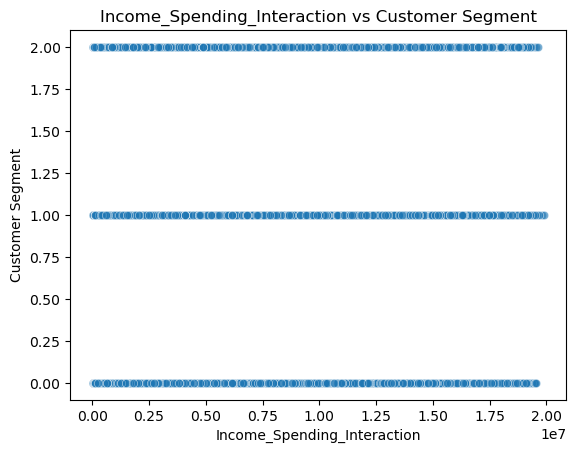

In [81]:
#LETS DO SOME EDA WITH THE NEW FEATURES AND TARGET VARIABLE
#Income_Spending_Interaction V/S CUSTOMER SEGMENT


sns.scatterplot(data=project_cleaned, x='Income_Spending_Interaction', y='Customer_Segment', alpha=0.6)
plt.title('Income_Spending_Interaction vs Customer Segment')
plt.xlabel('Income_Spending_Interaction')
plt.ylabel('Customer Segment')
plt.show()


In [82]:
#STATISTICAL ANALYSIS

# Perform ANOVA test
unique_segments = project_cleaned['Customer_Segment'].unique()
income_spending_interaction_groups = [project_cleaned['Income_Spending_Interaction'][project_cleaned['Customer_Segment'] == segment] for segment in unique_segments]

f_stat, p_value = stats.f_oneway(*income_spending_interaction_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The means of Income Spending Interaction differ significantly across Customer Segments.")
    
else:
    print("No significant difference in Income Spending Interaction means across Customer Segments.")

#THIS SHOWS THERE IS NO EFFECT OF SPENDING SCORE INTERACTION ON CUSTOMER SEGMENTS.

ANOVA F-statistic: 2.392932596564044
P-value: 0.09138514689562598
No significant difference in Income Spending Interaction means across Customer Segments.


In [87]:
#NOT EXECUTED!!!!!!!!

#Extracting meaningful time-based information from activity logs.
#Last Activity Time Difference: Calculate the time since the last activity.

#from datetime import datetime

#project_cleaned['Last_Activity_Days'] = (datetime.now() - pd.to_datetime(project_cleaned['Last_Activity'])).dt.days



In [83]:
#CHECKING CORRELATION AFTER DOING FEATURE ENGINEERING

correlation_with_target = project_cleaned.corr()['Customer_Segment'].sort_values(ascending=False)
print(correlation_with_target)


Customer_Segment                        1.000000
Product_Category_Home                   0.013500
Preferred_Payment_Method_Debit Card     0.011140
Product_Category_Fashion                0.009914
Marital_Status                          0.007104
Customer_Region_North America           0.006256
Loyalty_Customer_Years                  0.005888
Loyalty_Membership                      0.005554
Discount_Usage                          0.004336
Number_of_Orders                        0.004241
Orders_per_Year                         0.004054
Device_Used_Tablet                      0.003226
Last_Activity                           0.001854
Preferred_Payment_Method_Net Banking    0.000783
Customer_Region_Europe                  0.000671
Product_Category_Beauty                 0.000451
Annual_Income                           0.000026
Age                                    -0.000174
Device_Used_Mobile                     -0.000433
Years_as_Customer                      -0.000567
Order_Value_Frequenc

In [84]:
#Discount Propensity: Creating a binary feature for frequent discount users.

threshold=1 
project_cleaned['Frequent_Discount_User'] = (project_cleaned['Discount_Usage'] > threshold).astype(int)
project_cleaned.tail(56)

#This creates a binary feature where users who have used at least one discount 
#(i.e., Discount_Usage = 1) will be marked as 1 in the Frequent_Discount_User column,
#and others will be marked as 0.

,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Years_as_Customer,Number_of_Orders,Average_Order_Value,Loyalty_Membership,Discount_Usage,...,Customer_Region_Asia,Customer_Region_Europe,Customer_Region_North America,Customer_Region_South America,Income_Spending_Interaction,Loyalty_Customer_Years,Order_Value_Frequency,Orders_per_Year,Spending_Efficiency,Frequent_Discount_User
21944,32,0,103468,92,1,4,87,774.47,0,0,...,0,0,0,1,9519056,0,67378.89,21.750000,0.118791,0
21945,65,1,128109,3,0,2,86,448.52,1,1,...,0,0,1,0,384327,2,38572.72,43.000000,0.006689,0
21946,34,0,59336,30,1,4,95,948.97,0,1,...,0,0,1,0,1780080,0,90152.15,23.750000,0.031613,0
21947,49,1,132646,23,1,1,78,220.07,0,0,...,0,1,0,0,3050858,0,17165.46,78.000000,0.104512,0
21948,23,0,191161,98,0,12,89,287.84,1,1,...,1,0,0,0,18733778,12,25617.76,7.416667,0.340467,0
21949,53,1,32880,26,1,7,94,355.14,1,1,...,1,0,0,0,854880,7,33383.16,13.428571,0.073211,0
21950,69,0,160329,4,1,14,71,829.87,1,0,...,0,0,0,1,641316,14,58920.77,5.071429,0.004820,0
21951,19,1,136906,71,0,6,87,222.43,0,0,...,1,0,0,0,9720326,0,19351.41,14.500000,0.319202,0
21952,62,0,93445,61,1,11,88,157.07,0,0,...,0,0,1,0,5700145,0,13822.16,8.000000,0.388362,0
21953,65,0,196661,12,1,13,7,766.20,1,1,...,0,0,1,0,2359932,13,5363.40,0.538462,0.015662,0


In [107]:
#NOT EXECUTES!!!!!!

#Product Preference: Combine product categories to identify primary product preferences.

#project_cleaned['Primary_Product_Category'] = project_cleaned[['Product_Category_Home', 'Product_Category_Fashion', 'Product_Category_Sports']].idxmax(axis=1)


In [108]:
project_cleaned.head()

,Age,Gender,Annual_Income,Spending_Score,Marital_Status,Years_as_Customer,Number_of_Orders,Average_Order_Value,Loyalty_Membership,Discount_Usage,...,Customer_Region_South America,Income_Spending_Interaction,Loyalty_Customer_Years,Order_Value_Frequency,Orders_per_Year,Spending_Efficiency,Age_Group,Income_Bracket,Last_Activity_Days,Primary_Product_Category
0,69,0,192704,60,1,8,78,182.40,1,0,...,0,11562240,8,14227.20,9.750000,0.328947,Elder,Very High,20081,Product_Category_Fashion
1,62,0,165578,36,1,7,25,342.85,1,1,...,0,5960808,7,8571.25,3.571429,0.105002,Elder,Very High,20081,Product_Category_Sports
2,52,0,66523,46,0,4,68,275.57,1,0,...,0,3060058,4,18738.76,17.000000,0.166927,Senior,Medium,20081,Product_Category_Home
3,56,1,193559,83,0,5,88,97.62,1,1,...,0,16065397,5,8590.56,17.600000,0.850236,Senior,Very High,20081,Product_Category_Sports
4,56,0,57461,60,0,5,86,438.02,0,1,...,1,3447660,0,37669.72,17.200000,0.136980,Senior,Low,20081,Product_Category_Sports


In [88]:
#nOT EXECUTED!!!!!!!
#THIS IS SELECTING FEATURE USING ML MODEL RANDOM FOREST


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt




# Features and target variable
X = project_cleaned[['Age', 'Gender', 'Annual_Income', 'Spending_Score', 'Marital_Status',
       'Years_as_Customer', 'Number_of_Orders', 'Average_Order_Value',
       'Loyalty_Membership', 'Discount_Usage',
       'Last_Activity', 'Review_Score', 'Customer_Segment',
       'Product_Category_Beauty', 'Product_Category_Electronics',
       'Product_Category_Fashion', 'Product_Category_Home',
       'Product_Category_Sports', 'Preferred_Payment_Method_Credit Card',
       'Preferred_Payment_Method_Debit Card',
       'Preferred_Payment_Method_Net Banking',
       'Preferred_Payment_Method_PayPal', 'Device_Used_Desktop',
       'Device_Used_Mobile', 'Device_Used_Tablet', 'Customer_Region_Asia',
       'Customer_Region_Europe', 'Customer_Region_North America',
       'Customer_Region_South America', 'Income_Spending_Interaction',
       'Loyalty_Customer_Years', 'Order_Value_Frequency', 'Orders_per_Year',
       'Spending_Efficiency']]

y = project_cleaned['Customer_Segment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)



                                 Feature  Importance
12                      Customer_Segment    0.833189
10                         Last_Activity    0.012581
2                          Annual_Income    0.012451
33                   Spending_Efficiency    0.012427
7                    Average_Order_Value    0.012297
29           Income_Spending_Interaction    0.012174
31                 Order_Value_Frequency    0.011965
32                       Orders_per_Year    0.011384
0                                    Age    0.011168
3                         Spending_Score    0.010521
6                       Number_of_Orders    0.010091
5                      Years_as_Customer    0.006997
11                          Review_Score    0.005150
30                Loyalty_Customer_Years    0.005085
1                                 Gender    0.002132
9                         Discount_Usage    0.001927
4                         Marital_Status    0.001797
22                   Device_Used_Desktop    0.

In [85]:
#CHECKING WHICH COLUMN IS STILL AN OBJECT
#THIS SHOWS PREFERRED_DELIVERY_OPTION IS STILL AN OBJECT
project_cleaned.dtypes

Age                                       int64
Gender                                    int64
Annual_Income                             int64
Spending_Score                            int64
Marital_Status                            int64
Years_as_Customer                         int64
Number_of_Orders                          int64
Average_Order_Value                     float64
Loyalty_Membership                        int64
Discount_Usage                            int64
Preferred_Delivery_Option                object
Last_Activity                             int64
Review_Score                              int64
Customer_Segment                          int64
Product_Category_Beauty                   uint8
Product_Category_Electronics              uint8
Product_Category_Fashion                  uint8
Product_Category_Home                     uint8
Product_Category_Sports                   uint8
Preferred_Payment_Method_Credit Card      uint8
Preferred_Payment_Method_Debit Card     

In [86]:


#HERE, I'LL CONVERT PREFERRED DELIVERY OPTION INTO NUMERICAL FEATURE USING LABEL ENCODING

# Define a custom order for categories
preferred_order = {'Standard': 0, 'Same-Day': 1, 'Express': 2}  # Example categories

# Map the categories to the custom order and overwrite the original column
project_cleaned['Preferred_Delivery_Option'] = project_cleaned['Preferred_Delivery_Option'].map(preferred_order)

# Now check the data type
print(project_cleaned.dtypes)  # This will show that 'Preferred_Delivery_Option' is now int64, not object



Age                                       int64
Gender                                    int64
Annual_Income                             int64
Spending_Score                            int64
Marital_Status                            int64
Years_as_Customer                         int64
Number_of_Orders                          int64
Average_Order_Value                     float64
Loyalty_Membership                        int64
Discount_Usage                            int64
Preferred_Delivery_Option                 int64
Last_Activity                             int64
Review_Score                              int64
Customer_Segment                          int64
Product_Category_Beauty                   uint8
Product_Category_Electronics              uint8
Product_Category_Fashion                  uint8
Product_Category_Home                     uint8
Product_Category_Sports                   uint8
Preferred_Payment_Method_Credit Card      uint8
Preferred_Payment_Method_Debit Card     

FEATURE SELECTION USING VARIOUS METHODS

In [87]:
#FEATURE SELECTION USING UNIVARIATE FEATURE SELECTION
#WHY UNIVARIATE FEATURE SELECTION METHOD
#-EASY TO IMPLEMENT AND COMPUTATIONALLY EFFICIENT
#-The ANOVA F-test used in SelectKBest checks the relationship between each feature and the target variable. 
#This helps identify the most relevant features for the classification problem.
#-Good for initial exploration

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

#Separating the features(X) and target variable(Y)
X = project_cleaned.drop(columns=['Customer_Segment'])  # Features (excluding the target)
y = project_cleaned['Customer_Segment']  # Target variable

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Applying Univariate Feature Selection (ANOVA F-statistic)
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_new = selector.fit_transform(X_train, y_train)  # Fit and transform the training data

#Get the selected features
selected_features = X.columns[selector.get_support()]  # The columns corresponding to selected features
print("Selected Features:", selected_features)

#Transform the test set based on selected features
X_test_new = selector.transform(X_test)  # Apply the feature selection on test set

# I can use this `X_train_new` and `X_test_new` for model building.


Selected Features: Index(['Gender', 'Spending_Score', 'Marital_Status', 'Average_Order_Value',
       'Product_Category_Electronics', 'Product_Category_Home',
       'Preferred_Payment_Method_Debit Card', 'Income_Spending_Interaction',
       'Orders_per_Year', 'Spending_Efficiency'],
      dtype='object')


/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [88]:
#MODEL BUILDING USING THIS UNIVARIATE FEATURE SELECTION METHOD.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Initializing the Logistic Regression Model
logreg = LogisticRegression(max_iter=1000, random_state=42)

#Training the Model
logreg.fit(X_train_new, y_train)

#Making Predictions
y_pred = logreg.predict(X_test_new)

#Evaluating the Model
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

#Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


#THE ACCURACY WITH LOGISTIC REGRESSION IS NOT SATISFACTORY.SO, I'LL TRY OTHER CLASSIFIER.

Model Accuracy: 0.33136363636363636

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1467
           1       0.33      1.00      0.50      1458
           2       0.00      0.00      0.00      1475

    accuracy                           0.33      4400
   macro avg       0.11      0.33      0.17      4400
weighted avg       0.11      0.33      0.16      4400


Confusion Matrix:
 [[   0 1467    0]
 [   0 1458    0]
 [   0 1475    0]]


/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [89]:
#USING RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Training the Model
rf_model.fit(X_train_new, y_train)

#Making Predictions
y_pred_rf = rf_model.predict(X_test_new)

#Evaluating the Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))


#AGAIN THE ACCURACY IS NOT GOOD.

Random Forest Accuracy: 0.3286363636363636

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.33      0.34      0.33      1467
           1       0.33      0.32      0.33      1458
           2       0.33      0.33      0.33      1475

    accuracy                           0.33      4400
   macro avg       0.33      0.33      0.33      4400
weighted avg       0.33      0.33      0.33      4400


Confusion Matrix (Random Forest):
 [[494 477 496]
 [514 472 472]
 [507 488 480]]


In [89]:
#USING GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 2: Train the Model
gb_model.fit(X_train_new, y_train)

# Step 3: Make Predictions
y_pred_gb = gb_model.predict(X_test_new)

# Step 4: Evaluate the Model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

print("\nConfusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gb))

#THE ACCURACY IS NOT SATISFACTORY.

Gradient Boosting Accuracy: 0.3325

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.32      0.30      0.31      1467
           1       0.33      0.31      0.32      1458
           2       0.34      0.39      0.36      1475

    accuracy                           0.33      4400
   macro avg       0.33      0.33      0.33      4400
weighted avg       0.33      0.33      0.33      4400


Confusion Matrix (Gradient Boosting):
 [[439 466 562]
 [474 455 529]
 [447 459 569]]


In [90]:
#USING SVM CLASSIFIER

from sklearn.svm import SVC

# Step 1: Initialize the SVM Classifier
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Step 2: Train the Model
svm_model.fit(X_train_new, y_train)

# Step 3: Make Predictions
y_pred_svm = svm_model.predict(X_test_new)

# Step 4: Evaluate the Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))

#ACCURACY IS NOT SATISFACTORY.

SVM Accuracy: 0.3275

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1467
           1       0.32      0.31      0.32      1458
           2       0.33      0.67      0.44      1475

    accuracy                           0.33      4400
   macro avg       0.22      0.33      0.25      4400
weighted avg       0.22      0.33      0.25      4400


Confusion Matrix (SVM):
 [[   0  461 1006]
 [   0  452 1006]
 [   0  486  989]]


/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [92]:
pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [91]:
#USING XGBOOST 



from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Step 2: Train the Model
xgb_model.fit(X_train_new, y_train)

# Step 3: Make Predictions
y_pred_xgb = xgb_model.predict(X_test_new)

# Step 4: Evaluate the Model
# Accuracy Score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Classification Report
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))

#THE ACCURACY OF XGBOOST IS ALSO AROUND 33%

/Users/sumaiyairshad/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [01:45:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.32931818181818184

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.33      0.33      0.33      1467
           1       0.31      0.30      0.30      1458
           2       0.35      0.35      0.35      1475

    accuracy                           0.33      4400
   macro avg       0.33      0.33      0.33      4400
weighted avg       0.33      0.33      0.33      4400


Confusion Matrix (XGBoost):
 [[489 512 466]
 [518 444 496]
 [461 498 516]]
